# Assignment 3 Image Compression by K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

from skimage import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from PIL import Image
import cv2
import os

from scipy.spatial import KDTree

#import webcolors
from webcolors import CSS3_HEX_TO_NAMES
from webcolors import hex_to_rgb


In [2]:
# images = ["baboon.png", "flowers.png", "graffiti.png", "lena.png", "umbrella.png"]

In [3]:
def import_image(file_name):
    
    image = io.imread(file_name)
    io.imshow(file_name)
    io.show()
    
    return image

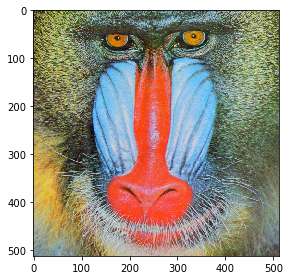

In [4]:
baboon = import_image('baboon.png')

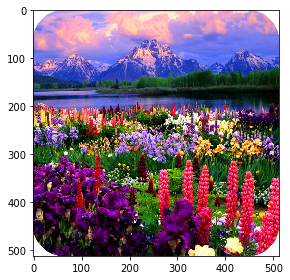

In [5]:
flowers = import_image('flowers.png')

In [6]:
flowers.shape

(512, 512, 4)

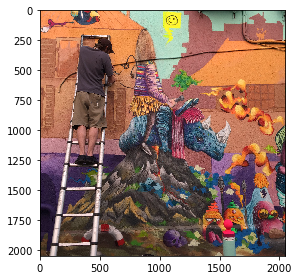

In [7]:
graffiti = import_image('graffiti.png')

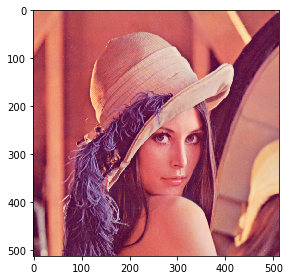

In [8]:
lena = import_image('lena.png')

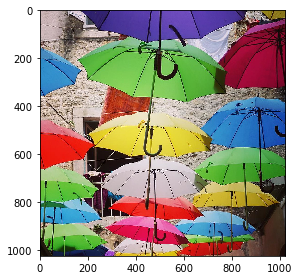

In [9]:
umbrella = import_image('umbrella.png')

In [10]:
baboon = cv2.resize(baboon, (256, 256))
flowers = cv2.resize(flowers, (256, 256))
lena = cv2.resize(lena, (256, 256))
umbrella = cv2.resize(umbrella, (256, 256))
graffiti = cv2.resize(graffiti, (256, 256))

In [11]:
baboon=baboon.astype(int)
flowers=flowers.astype(int)
lena=lena.astype(int)
umbrella=umbrella.astype(int)
graffiti=graffiti.astype(int)

In [12]:
def reshape_image(image):
    
    rows = image.shape[0]
    cols = image.shape[1]
    
    image = image.reshape(rows*cols, 3)
    
    return image

In [13]:
baboon_array = reshape_image(baboon)

Dropping 4rd Column

In [14]:
flowers_copy = flowers.copy()

flowers = np.empty([256, 256, 3]) # flowers.shape

for i in range(256):
    for j in range(256):
        flowers[i][j]= np.delete(flowers_copy[i][j],3)

In [15]:
flowers_array = reshape_image(flowers)

In [16]:
lena_array = reshape_image(lena)

In [17]:
umbrella_array = reshape_image(umbrella)

In [18]:
graffiti_array = reshape_image(graffiti)

In [19]:
baboon_rows = baboon.shape[0]
baboon_cols = baboon.shape[1]

In [20]:
flowers_rows = flowers.shape[0]
flowers_cols = flowers.shape[1]

In [21]:
graffiti_rows = graffiti.shape[0]
graffiti_cols = graffiti.shape[1]

In [22]:
lena_rows = lena.shape[0]
lena_cols = lena.shape[1]

In [23]:
umbrella_rows = umbrella.shape[0]
umbrella_cols = umbrella.shape[1]

In [24]:
def image_bytes(image):
    
    size = os.path.getsize(image)
    
    return size

In [25]:
baboon_bytes_ = image_bytes('baboon.png')
print("baboon bytes", baboon_bytes_)

baboon bytes 651142


In [26]:
flowers_bytes_ = image_bytes('flowers.png')
print("flowers bytes", flowers_bytes_)

flowers bytes 615128


In [27]:
graffiti_bytes_ = image_bytes('graffiti.png')
print("graffiti bytes", graffiti_bytes_)

graffiti bytes 6254727


In [28]:
lena_bytes_ = image_bytes('lena.png')
print("lena bytes", lena_bytes_)

lena bytes 473831


In [29]:
umbrella_bytes_ = image_bytes('umbrella.png')
print("umbrella bytes", umbrella_bytes_)

umbrella bytes 1608086


In [335]:
print("baboon bytes", baboon_bytes_, " baboon unique colors", baboon_ucolors_)
print("flowers bytes", flowers_bytes_, " flowers unique colors", flowers_ucolors_)
print("graffiti bytes", graffiti_bytes_, "graffiti unique colors", graffiti_ucolors_)
print("lena bytes", lena_bytes_, "lena unique colors", lena_ucolors_)
print("umbrella bytes", umbrella_bytes_, "umbrella unique colors", umbrella_ucolors_)



baboon bytes 651142  baboon unique colors 62070
flowers bytes 615128  flowers unique colors 57848
graffiti bytes 6254727 graffiti unique colors 45614
lena bytes 473831 lena unique colors 48331
umbrella bytes 1608086 umbrella unique colors 48926


In [30]:
def unique_colors(image):
    
    uniques = np.unique(image.reshape(-1, image.shape[-1]), axis=0)
    
    return len(uniques)

In [330]:
baboon_ucolors_ = unique_colors(baboon)
print("baboon unique colors", baboon_ucolors_)

baboon unique colors 62070


In [331]:
flowers_ucolors_ = unique_colors(flowers)
print("flowers unique colors", flowers_ucolors_)

flowers unique colors 57848


In [332]:
graffiti_ucolors_ = unique_colors(graffiti)
print("graffiti unique colors", graffiti_ucolors_)

graffiti unique colors 45614


In [333]:
lena_ucolors_ = unique_colors(lena)
print("lena unique colors", lena_ucolors_)

lena unique colors 48331


In [334]:
umbrella_ucolors_ = unique_colors(umbrella)
print("umbrella unique colors", umbrella_ucolors_)

umbrella unique colors 48926


In [36]:
k_list = [256, 128, 64, 32, 16, 8, 4, 2]

def kmeans(k):
    for i in k_list:
        baboon_kmeans = KMeans(n_clusters = i)
        baboon_kmeans.fit(baboon_image)

        io.imsave("baboon_kmeans_i_compressed.png", baboon_kmeans_i_compressed )
        io.imshow(baboon_kmeans_256_compressed )
        io.show()
        

WCSS: Within Cluster Sum of Squares
    
The average of all squared distances between all cluster centroids and data points, for all points in the data.

In [37]:
#https://stackoverflow.com/questions/68714612/compute-between-clusters-sum-of-squares-bcss-and-total-sum-of-squares-manually
#https://www.analyticsvidhya.com/blog/2021/08/kmeans-clustering/

In [38]:
def wcss(image, center):
    
    distance_wc = np.sum((image-center)**2)
    result1 = distance_wc/len(image)
    
    return result1

BCSS: Between Cluster Sum of Squares

The average of all distances between the centroids and the total sample mean that is multiplied by the number of points within each cluster.

In [39]:
def bcss(image, center):
    
    mean_bcss = np.mean(image,axis=0)
    distance_bc = np.sum((mean_bcss-center)**2)
    result2 = distance_bc*len(image)
    
    return result2

Silhoutte Coefficient

https://www.kaggle.com/achintyatripathi/kmeans-from-scratch-with-silhoutte-and-elbow-curve

def silhoutte_coef():
    

## Baboon.png

In [40]:
baboon

array([[[121, 107,  49],
        [ 75,  61,  26],
        [110,  94,  47],
        ...,
        [ 93,  86,  61],
        [127, 131,  80],
        [144, 164, 105]],

       [[111, 104,  46],
        [ 69,  59,  32],
        [ 99,  95,  43],
        ...,
        [109, 121,  85],
        [101,  99,  64],
        [ 84,  80,  56]],

       [[105,  95,  38],
        [121,  99,  52],
        [ 93,  85,  43],
        ...,
        [105, 102,  72],
        [ 69,  69,  46],
        [113, 140,  81]],

       ...,

       [[ 95, 111, 112],
        [124, 149, 149],
        [125, 145, 146],
        ...,
        [ 97, 105,  92],
        [ 90,  94,  81],
        [ 87,  87,  77]],

       [[115, 140, 145],
        [124, 153, 151],
        [115, 137, 129],
        ...,
        [101,  91,  85],
        [ 90,  92,  81],
        [ 90,  86,  79]],

       [[ 66,  86,  86],
        [ 63,  74,  66],
        [ 57,  66,  62],
        ...,
        [ 49,  44,  43],
        [ 41,  44,  41],
        [ 46,  36,  40]]

In [41]:
baboon_bytes = []
baboon_ucolors = []
baboon_wcss = []
baboon_bcss = []
baboon_silhouette = []

## baboon.png k=256

In [182]:
baboon_kmeans_256 = KMeans(n_clusters=256)

In [183]:
baboon_kmeans_256.fit(baboon_array)

KMeans(n_clusters=256)

In [184]:
baboon_kmeans_256_compressed = baboon_kmeans_256.cluster_centers_[baboon_kmeans_256.labels_]

In [185]:
baboon_kmeans_256_compressed = np.clip(baboon_kmeans_256_compressed.astype('uint8'), 0, 255)

In [186]:
baboon_kmeans_256_compressed  = baboon_kmeans_256_compressed.reshape(baboon_rows,baboon_cols,3)

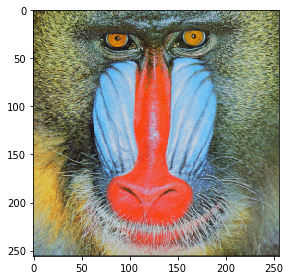

In [187]:
io.imsave("baboon_kmeans_256_compressed.png", baboon_kmeans_256_compressed )
io.imshow(baboon_kmeans_256_compressed)
io.show()

In [188]:
baboon_kmeans_256_bytes = image_bytes("baboon_kmeans_256_compressed.png")
baboon_bytes.append(baboon_kmeans_256_bytes)
print("baboon kmeans_256 bytes", baboon_kmeans_256_bytes)

baboon kmeans_256 bytes 139134


In [189]:
baboon_256_wcss=wcss(baboon_array, baboon_kmeans_256.cluster_centers_[baboon_kmeans_256.labels_])
baboon_256_wcss

71.97251357664129

## baboon.png k=128

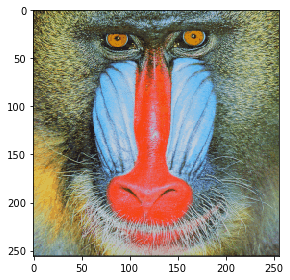

In [190]:
baboon_kmeans_128 = KMeans(n_clusters=128)
baboon_kmeans_128.fit(baboon_array)

baboon_kmeans_128_compressed = baboon_kmeans_128.cluster_centers_[baboon_kmeans_128.labels_]
baboon_kmeans_128_compressed = np.clip(baboon_kmeans_128_compressed.astype('uint8'), 0, 255)
baboon_kmeans_128_compressed  = baboon_kmeans_128_compressed.reshape(baboon_rows, baboon_cols, 3)

io.imsave("baboon_kmeans_128_compressed.png", baboon_kmeans_128_compressed )
io.imshow(baboon_kmeans_128_compressed )
io.show()

In [191]:
baboon_kmeans_128_bytes = image_bytes("baboon_kmeans_128_compressed.png")
baboon_bytes.append(baboon_kmeans_128_bytes)
print("baboon kmeans_128 bytes", baboon_kmeans_128_bytes)

baboon kmeans_128 bytes 122495


## baboon.png k=64

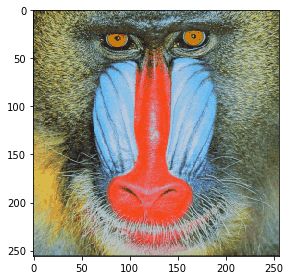

In [192]:
baboon_kmeans_64 = KMeans(n_clusters=64)
baboon_kmeans_64.fit(baboon_array)

baboon_kmeans_64_compressed = baboon_kmeans_64.cluster_centers_[baboon_kmeans_64.labels_]
baboon_kmeans_64_compressed = np.clip(baboon_kmeans_64_compressed.astype('uint8'), 0, 255)
baboon_kmeans_64_compressed  = baboon_kmeans_64_compressed.reshape(baboon_rows,baboon_cols,3)

io.imsave("baboon_kmeans_64_compressed.png", baboon_kmeans_64_compressed )
io.imshow(baboon_kmeans_64_compressed )
io.show()

In [193]:
baboon_kmeans_64_bytes = image_bytes("baboon_kmeans_64_compressed.png")
baboon_bytes.append(baboon_kmeans_64_bytes)
print("baboon kmeans_64 bytes", baboon_kmeans_64_bytes)

baboon kmeans_64 bytes 97168


## baboon.png k=32

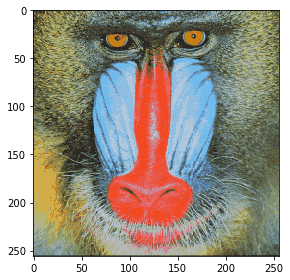

In [194]:
baboon_kmeans_32 = KMeans(n_clusters=32)
baboon_kmeans_32.fit(baboon_array)

baboon_kmeans_32_compressed = baboon_kmeans_32.cluster_centers_[baboon_kmeans_32.labels_]
baboon_kmeans_32_compressed = np.clip(baboon_kmeans_32_compressed.astype('uint8'), 0, 255)
baboon_kmeans_32_compressed  = baboon_kmeans_32_compressed.reshape(baboon_rows,baboon_cols,3)

io.imsave("baboon_kmeans_32_compressed.png", baboon_kmeans_32_compressed )
io.imshow(baboon_kmeans_32_compressed)
io.show()

In [195]:
baboon_kmeans_32_bytes = image_bytes("baboon_kmeans_32_compressed.png")
baboon_bytes.append(baboon_kmeans_32_bytes)
print("baboon kmeans_32 bytes", baboon_kmeans_32_bytes)

baboon kmeans_32 bytes 68637


## baboon.png k=16

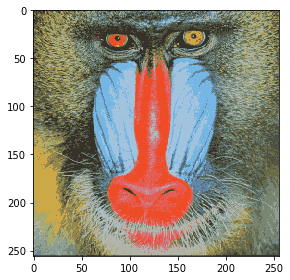

In [196]:
baboon_kmeans_16 = KMeans(n_clusters=16)
baboon_kmeans_16.fit(baboon_array)

baboon_kmeans_16_compressed = baboon_kmeans_16.cluster_centers_[baboon_kmeans_16.labels_]
baboon_kmeans_16_compressed = np.clip(baboon_kmeans_16_compressed.astype('uint8'), 0, 255)
baboon_kmeans_16_compressed  = baboon_kmeans_16_compressed.reshape(baboon_rows,baboon_cols,3)

io.imsave("baboon_kmeans_16_compressed.png", baboon_kmeans_16_compressed )
io.imshow(baboon_kmeans_16_compressed)
io.show()

In [197]:
baboon_kmeans_16_bytes = image_bytes("baboon_kmeans_16_compressed.png")
baboon_bytes.append(baboon_kmeans_16_bytes)
print("baboon kmeans_16 bytes", baboon_kmeans_16_bytes)

baboon kmeans_16 bytes 44111


## baboon.png k=8

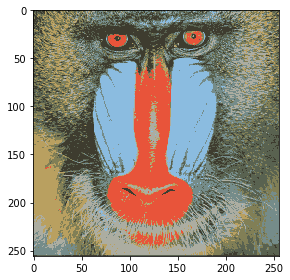

In [198]:
baboon_kmeans_8 = KMeans(n_clusters=8)
baboon_kmeans_8.fit(baboon_array)

baboon_kmeans_8_compressed = baboon_kmeans_8.cluster_centers_[baboon_kmeans_8.labels_]
baboon_kmeans_8_compressed = np.clip(baboon_kmeans_8_compressed.astype('uint8'), 0, 255)
baboon_kmeans_8_compressed  = baboon_kmeans_8_compressed.reshape(baboon_rows,baboon_cols,3)

io.imsave("baboon_kmeans_8_compressed.png", baboon_kmeans_8_compressed )
io.imshow(baboon_kmeans_8_compressed)
io.show()

In [199]:
baboon_kmeans_8_bytes = image_bytes("baboon_kmeans_8_compressed.png")
baboon_bytes.append(baboon_kmeans_8_bytes)
print("baboon kmeans_8 bytes", baboon_kmeans_8_bytes)

baboon kmeans_8 bytes 27677


## baboon.png k=4

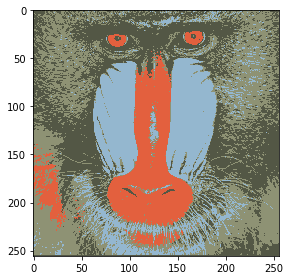

In [200]:
baboon_kmeans_4 = KMeans(n_clusters=4)
baboon_kmeans_4.fit(baboon_array)

baboon_kmeans_4_compressed = baboon_kmeans_4.cluster_centers_[baboon_kmeans_4.labels_]
baboon_kmeans_4_compressed = np.clip(baboon_kmeans_4_compressed.astype('uint8'), 0, 255)
baboon_kmeans_4_compressed  = baboon_kmeans_4_compressed.reshape(baboon_rows,baboon_cols,3)

io.imsave("baboon_kmeans_4_compressed.png", baboon_kmeans_4_compressed )
io.imshow(baboon_kmeans_4_compressed)
io.show()

In [201]:
baboon_kmeans_4_bytes = image_bytes("baboon_kmeans_4_compressed.png")
baboon_bytes.append(baboon_kmeans_4_bytes)
print("baboon kmeans_4 bytes", baboon_kmeans_4_bytes)

baboon kmeans_4 bytes 15415


## baboon.png k=2

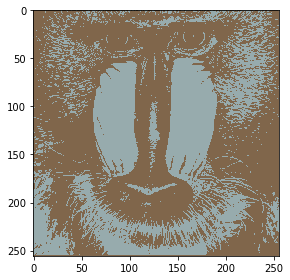

In [202]:
baboon_kmeans_2 = KMeans(n_clusters=2)
baboon_kmeans_2.fit(baboon_array)

baboon_kmeans_2_compressed = baboon_kmeans_2.cluster_centers_[baboon_kmeans_2.labels_]
baboon_kmeans_2_compressed = np.clip(baboon_kmeans_2_compressed.astype('uint8'), 0, 255)
baboon_kmeans_2_compressed  = baboon_kmeans_2_compressed.reshape(baboon_rows,baboon_cols,3)

io.imsave("baboon_kmeans_2_compressed.png", baboon_kmeans_2_compressed )
io.imshow(baboon_kmeans_2_compressed)
io.show()

In [203]:
baboon_kmeans_2_bytes = image_bytes("baboon_kmeans_2_compressed.png")
baboon_bytes.append(baboon_kmeans_2_bytes)
print("baboon kmeans_2 bytes", baboon_kmeans_2_bytes)

baboon kmeans_2 bytes 9407


In [204]:
baboon_bytes

[139251,
 122197,
 97407,
 68332,
 44662,
 27878,
 15395,
 9427,
 139134,
 122495,
 97168,
 68637,
 44111,
 27677,
 15415,
 9407]

# flowers.png

In [205]:
flowers

array([[[186., 157., 227.],
        [185., 158., 222.],
        [187., 159., 229.],
        ...,
        [236., 166., 206.],
        [229., 165., 211.],
        [220., 161., 212.]],

       [[190., 156., 227.],
        [200., 157., 225.],
        [209., 165., 230.],
        ...,
        [233., 161., 201.],
        [228., 159., 203.],
        [225., 162., 208.]],

       [[202., 160., 234.],
        [216., 164., 233.],
        [217., 164., 226.],
        ...,
        [233., 161., 202.],
        [231., 161., 202.],
        [226., 161., 206.]],

       ...,

       [[  0.,  31.,   7.],
        [  0.,  17.,   1.],
        [  0.,   4.,   0.],
        ...,
        [217.,  39.,  79.],
        [196.,   7.,  32.],
        [242.,  15.,  72.]],

       [[  0.,  10.,   2.],
        [  0.,   4.,   0.],
        [  0.,  10.,   1.],
        ...,
        [173.,  36.,  61.],
        [197.,   0.,  23.],
        [204.,   0.,  29.]],

       [[  0.,   3.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [206]:
print(flowers.shape)

(256, 256, 3)


In [207]:
flowers_bytes = []
flowers_ucolors = []
flowers_wcss = []
flowers_bcss = []
flowers_silhouette = []

###  flowers.png k=256

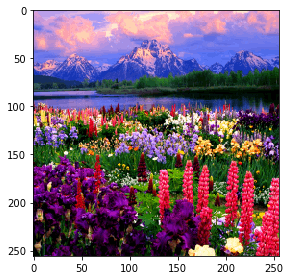

In [208]:
flowers_kmeans_256 = KMeans(n_clusters=256)
flowers_kmeans_256.fit(flowers_array)

flowers_kmeans_256_compressed = flowers_kmeans_256.cluster_centers_[flowers_kmeans_256.labels_]
flowers_kmeans_256_compressed  = np.clip(flowers_kmeans_256_compressed.astype('uint8'), 0, 255)
flowers_kmeans_256_compressed = flowers_kmeans_256_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_256_compressed.png", flowers_kmeans_256_compressed)
io.imshow(flowers_kmeans_256_compressed)
io.show()

In [209]:
flowers_kmeans_256_bytes = image_bytes("flowers_kmeans_256_compressed.png")
flowers_bytes.append(flowers_kmeans_256_bytes)
print("flowers kmeans_256 bytes: ", flowers_kmeans_256_bytes)

flowers kmeans_256 bytes:  123173


###  flowers.png k=128

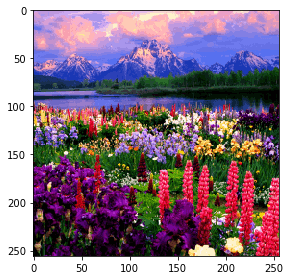

In [210]:
flowers_kmeans_128 = KMeans(n_clusters=128)
flowers_kmeans_128.fit(flowers_array)

flowers_kmeans_128_compressed = flowers_kmeans_128.cluster_centers_[flowers_kmeans_128.labels_]
flowers_kmeans_128_compressed  = np.clip(flowers_kmeans_128_compressed.astype('uint8'), 0, 255)
flowers_kmeans_128_compressed = flowers_kmeans_128_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_128_compressed.png", flowers_kmeans_128_compressed)
io.imshow(flowers_kmeans_128_compressed)
io.show()

In [211]:
flowers_kmeans_128_bytes = image_bytes("flowers_kmeans_128_compressed.png")
flowers_bytes.append(flowers_kmeans_128_bytes)
print("flowers kmeans_128 bytes: ", flowers_kmeans_128_bytes)

flowers kmeans_128 bytes:  108147


###  flowers.png k=64

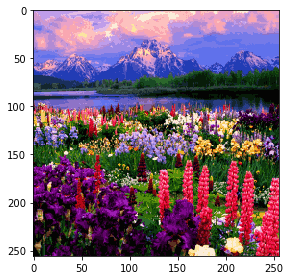

In [212]:
flowers_kmeans_64 = KMeans(n_clusters=64)
flowers_kmeans_64.fit(flowers_array)

flowers_kmeans_64_compressed = flowers_kmeans_64.cluster_centers_[flowers_kmeans_64.labels_]
flowers_kmeans_64_compressed  = np.clip(flowers_kmeans_64_compressed.astype('uint8'), 0, 255)
flowers_kmeans_64_compressed = flowers_kmeans_64_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_64_compressed.png", flowers_kmeans_64_compressed)
io.imshow(flowers_kmeans_64_compressed)
io.show()

In [213]:
flowers_kmeans_64_bytes = image_bytes("flowers_kmeans_64_compressed.png")
flowers_bytes.append(flowers_kmeans_64_bytes)
print("flowers kmeans_64 bytes: ", flowers_kmeans_64_bytes)

flowers kmeans_64 bytes:  87154


###  flowers.png k=32

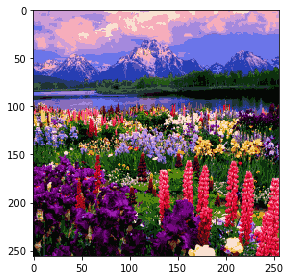

In [214]:
flowers_kmeans_32 = KMeans(n_clusters=32)
flowers_kmeans_32.fit(flowers_array)

flowers_kmeans_32_compressed = flowers_kmeans_32.cluster_centers_[flowers_kmeans_32.labels_]
flowers_kmeans_32_compressed  = np.clip(flowers_kmeans_32_compressed.astype('uint8'), 0, 255)
flowers_kmeans_32_compressed = flowers_kmeans_32_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_32_compressed.png", flowers_kmeans_32_compressed)
io.imshow(flowers_kmeans_32_compressed)
io.show()

In [215]:
flowers_kmeans_32_bytes = image_bytes("flowers_kmeans_32_compressed.png")
flowers_bytes.append(flowers_kmeans_32_bytes)
print("flowers kmeans_32 bytes: ", flowers_kmeans_32_bytes)

flowers kmeans_32 bytes:  65160


###  flowers.png k=16

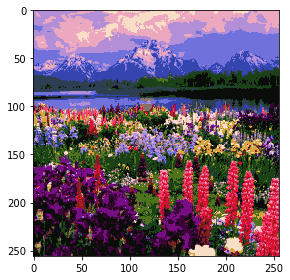

In [216]:
flowers_kmeans_16 = KMeans(n_clusters=16)
flowers_kmeans_16.fit(flowers_array)

flowers_kmeans_16_compressed = flowers_kmeans_16.cluster_centers_[flowers_kmeans_16.labels_]
flowers_kmeans_16_compressed  = np.clip(flowers_kmeans_16_compressed.astype('uint8'), 0, 255)
flowers_kmeans_16_compressed = flowers_kmeans_16_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_16_compressed.png", flowers_kmeans_16_compressed)
io.imshow(flowers_kmeans_16_compressed)
io.show()

In [217]:
flowers_kmeans_16_bytes = image_bytes("flowers_kmeans_16_compressed.png")
flowers_bytes.append(flowers_kmeans_16_bytes)
print("flowers kmeans_16 bytes: ", flowers_kmeans_16_bytes)

flowers kmeans_16 bytes:  43400


###  flowers.png k=8

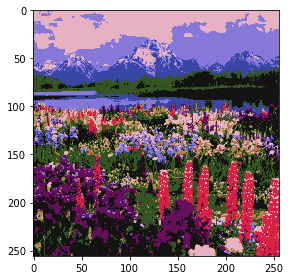

In [218]:
flowers_kmeans_8 = KMeans(n_clusters=8)
flowers_kmeans_8.fit(flowers_array)

flowers_kmeans_8_compressed = flowers_kmeans_8.cluster_centers_[flowers_kmeans_8.labels_]
flowers_kmeans_8_compressed  = np.clip(flowers_kmeans_8_compressed.astype('uint8'), 0, 255)
flowers_kmeans_8_compressed = flowers_kmeans_8_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_8_compressed.png", flowers_kmeans_8_compressed)
io.imshow(flowers_kmeans_8_compressed)
io.show()

In [219]:
flowers_kmeans_8_bytes = image_bytes("flowers_kmeans_8_compressed.png")
flowers_bytes.append(flowers_kmeans_8_bytes)
print("flowers kmeans_8 bytes", flowers_kmeans_8_bytes)

flowers kmeans_8 bytes 26032


### flowers.png k=4

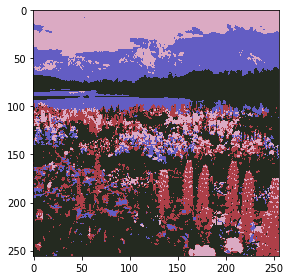

In [220]:
flowers_kmeans_4 = KMeans(n_clusters=4)
flowers_kmeans_4.fit(flowers_array)

flowers_kmeans_4_compressed = flowers_kmeans_4.cluster_centers_[flowers_kmeans_4.labels_]
flowers_kmeans_4_compressed  = np.clip(flowers_kmeans_4_compressed.astype('uint8'), 0, 255)
flowers_kmeans_4_compressed = flowers_kmeans_4_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_4_compressed.png", flowers_kmeans_4_compressed)
io.imshow(flowers_kmeans_4_compressed)
io.show()

In [221]:
flowers_kmeans_4_bytes = image_bytes("flowers_kmeans_4_compressed.png")
flowers_bytes.append(flowers_kmeans_4_bytes)
print("flowers kmeans_4 bytes", flowers_kmeans_4_bytes)

flowers kmeans_4 bytes 14116


###  flowers.png k=2

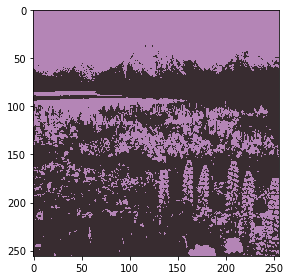

In [222]:
flowers_kmeans_2 = KMeans(n_clusters=2)
flowers_kmeans_2.fit(flowers_array)

flowers_kmeans_2_compressed = flowers_kmeans_2.cluster_centers_[flowers_kmeans_2.labels_]
flowers_kmeans_2_compressed  = np.clip(flowers_kmeans_2_compressed.astype('uint8'), 0, 255)
flowers_kmeans_2_compressed = flowers_kmeans_2_compressed.reshape(flowers_rows,flowers_cols,3)

io.imsave("flowers_kmeans_2_compressed.png", flowers_kmeans_2_compressed)
io.imshow(flowers_kmeans_2_compressed)
io.show()

In [223]:
flowers_kmeans_2_bytes = image_bytes("flowers_kmeans_2_compressed.png")
flowers_bytes.append(flowers_kmeans_2_bytes)
print("flowers kmeans_2 bytes", flowers_kmeans_2_bytes)

flowers kmeans_2 bytes 7558


In [224]:
flowers_bytes

[123173, 108147, 87154, 65160, 43400, 26032, 14116, 7558]

# lena.png

In [225]:
lena

array([[226, 137, 125],
       [223, 137, 131],
       [226, 134, 118],
       ...,
       [168,  71,  85],
       [178,  68,  78],
       [183,  73,  81]])

In [226]:
print(lena.shape)

(65536, 3)


In [227]:
lena = lena.reshape(lena_rows*lena_cols, 3)

In [228]:
lena_bytes = []
lena_ucolors = []
lena_wcss = []
lena_bcss = []
lena_silhouette = []

###  lena.png k=256

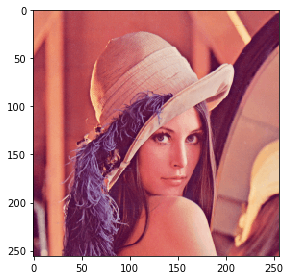

In [229]:
lena_kmeans_256 = KMeans(n_clusters=256)
lena_kmeans_256.fit(lena_array)

lena_kmeans_256_compressed = lena_kmeans_256.cluster_centers_[lena_kmeans_256.labels_]
lena_kmeans_256_compressed = np.clip(lena_kmeans_256_compressed.astype('uint8'), 0, 255)
lena_kmeans_256_compressed = lena_kmeans_256_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_256_compressed.png", lena_kmeans_256_compressed)
io.imshow(lena_kmeans_256_compressed)
io.show()

In [230]:
lena_kmeans_256_bytes = image_bytes("lena_kmeans_256_compressed.png")
lena_bytes.append(lena_kmeans_256_bytes)
print("lena kmeans_256 bytes", lena_kmeans_256_bytes)

lena kmeans_256 bytes 98011


###  lena.png k=128

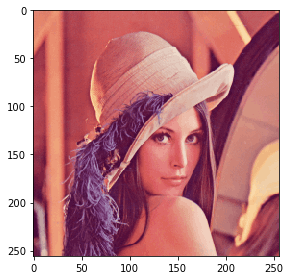

In [231]:
lena_kmeans_128 = KMeans(n_clusters=128)
lena_kmeans_128.fit(lena_array)

lena_kmeans_128_compressed = lena_kmeans_128.cluster_centers_[lena_kmeans_128.labels_]
lena_kmeans_128_compressed = np.clip(lena_kmeans_128_compressed.astype('uint8'), 0, 255)
lena_kmeans_128_compressed = lena_kmeans_128_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_128_compressed.png", lena_kmeans_128_compressed)
io.imshow(lena_kmeans_128_compressed)
io.show()

In [232]:
lena_kmeans_128_bytes = image_bytes("lena_kmeans_128_compressed.png")
lena_bytes.append(lena_kmeans_128_bytes)
print("lena kmeans_128 bytes", lena_kmeans_128_bytes)

lena kmeans_128 bytes 82144


###  lena.png k=64

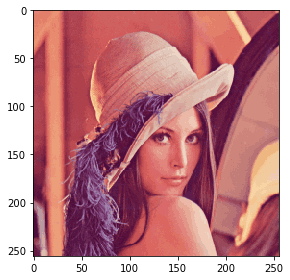

In [233]:
lena_kmeans_64 = KMeans(n_clusters=64)
lena_kmeans_64.fit(lena_array)

lena_kmeans_64_compressed = lena_kmeans_64.cluster_centers_[lena_kmeans_64.labels_]
lena_kmeans_64_compressed = np.clip(lena_kmeans_64_compressed.astype('uint8'), 0, 255)
lena_kmeans_64_compressed = lena_kmeans_64_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_64_compressed.png", lena_kmeans_64_compressed)
io.imshow(lena_kmeans_64_compressed)
io.show()

In [234]:
lena_kmeans_64_bytes = image_bytes("lena_kmeans_64_compressed.png")
lena_bytes.append(lena_kmeans_64_bytes)
print("lena kmeans_64 bytes", lena_kmeans_64_bytes)

lena kmeans_64 bytes 63082


###  lena.png k=32

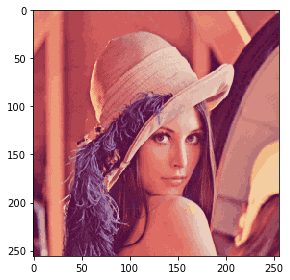

In [235]:
lena_kmeans_32 = KMeans(n_clusters=32)
lena_kmeans_32.fit(lena_array)

lena_kmeans_32_compressed = lena_kmeans_32.cluster_centers_[lena_kmeans_32.labels_]
lena_kmeans_32_compressed = np.clip(lena_kmeans_32_compressed.astype('uint8'), 0, 255)
lena_kmeans_32_compressed = lena_kmeans_32_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_32_compressed.png", lena_kmeans_32_compressed)
io.imshow(lena_kmeans_32_compressed)
io.show()

In [236]:
lena_kmeans_32_bytes = image_bytes("lena_kmeans_32_compressed.png")
lena_bytes.append(lena_kmeans_32_bytes)
print("flena kmeans_32 bytes", lena_kmeans_32_bytes)

flena kmeans_32 bytes 44147


### lena.png k=16

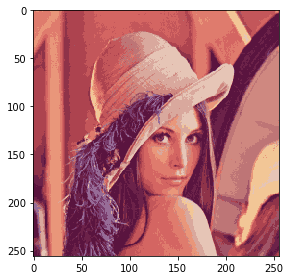

In [237]:
lena_kmeans_16 = KMeans(n_clusters=16)
lena_kmeans_16.fit(lena_array)

lena_kmeans_16_compressed = lena_kmeans_16.cluster_centers_[lena_kmeans_16.labels_]
lena_kmeans_16_compressed = np.clip(lena_kmeans_16_compressed.astype('uint8'), 0, 255)
lena_kmeans_16_compressed = lena_kmeans_16_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_16_compressed.png", lena_kmeans_16_compressed)
io.imshow(lena_kmeans_16_compressed)
io.show()

In [238]:
lena_kmeans_16_bytes = image_bytes("lena_kmeans_16_compressed.png")
lena_bytes.append(lena_kmeans_16_bytes)
print("lena kmeans_16 bytes", lena_kmeans_16_bytes)

lena kmeans_16 bytes 28663


###  lena.png k=8

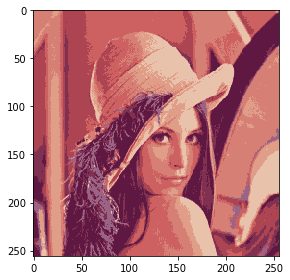

In [239]:
lena_kmeans_8 = KMeans(n_clusters=8)
lena_kmeans_8.fit(lena_array)

lena_kmeans_8_compressed = lena_kmeans_8.cluster_centers_[lena_kmeans_8.labels_]
lena_kmeans_8_compressed = np.clip(lena_kmeans_8_compressed.astype('uint8'), 0, 255)
lena_kmeans_8_compressed = lena_kmeans_8_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_8_compressed.png", lena_kmeans_8_compressed)
io.imshow(lena_kmeans_8_compressed)
io.show()

In [240]:
lena_kmeans_8_bytes = image_bytes("lena_kmeans_8_compressed.png")
lena_bytes.append(lena_kmeans_8_bytes)
print("lena_kmeans_8 bytes", lena_kmeans_8_bytes)

lena_kmeans_8 bytes 18788


###  lena.png k=4

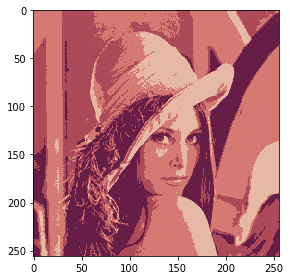

In [241]:
lena_kmeans_4 = KMeans(n_clusters=4)
lena_kmeans_4.fit(lena_array)

lena_kmeans_4_compressed = lena_kmeans_4.cluster_centers_[lena_kmeans_4.labels_]
lena_kmeans_4_compressed = np.clip(lena_kmeans_4_compressed.astype('uint8'), 0, 255)
lena_kmeans_4_compressed = lena_kmeans_4_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_4_compressed.png", lena_kmeans_4_compressed)
io.imshow(lena_kmeans_4_compressed)
io.show()

In [242]:
lena_kmeans_4_bytes = image_bytes("lena_kmeans_4_compressed.png")
lena_bytes.append(lena_kmeans_4_bytes)
print("lena_kmeans_4 bytes", lena_kmeans_4_bytes)

lena_kmeans_4 bytes 10585


###  lena.png k=2

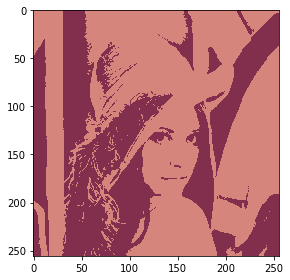

In [243]:
lena_kmeans_2 = KMeans(n_clusters=2)
lena_kmeans_2.fit(lena_array)

lena_kmeans_2_compressed = lena_kmeans_2.cluster_centers_[lena_kmeans_2.labels_]
lena_kmeans_2_compressed = np.clip(lena_kmeans_2_compressed.astype('uint8'), 0, 255)
lena_kmeans_2_compressed = lena_kmeans_2_compressed.reshape(lena_rows,lena_cols,3)

io.imsave("lena_kmeans_2_compressed.png", lena_kmeans_2_compressed)
io.imshow(lena_kmeans_2_compressed)
io.show()

In [244]:
lena_kmeans_2_bytes = image_bytes("lena_kmeans_2_compressed.png")
lena_bytes.append(lena_kmeans_2_bytes)
print("lena_kmeans_2 bytes", lena_kmeans_2_bytes)

lena_kmeans_2 bytes 4706


In [245]:
lena_bytes

[98011, 82144, 63082, 44147, 28663, 18788, 10585, 4706]

# umbrella.png

In [246]:
umbrella_bytes = []
umbrella_ucolors = []
umbrella_wcss = []
umbrella_bcss = []
umbrella_silhouette = []

### umbrella.png k=256

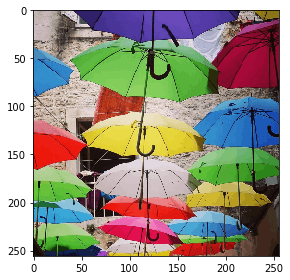

In [247]:
umbrella_kmeans_256 = KMeans(n_clusters=256)
umbrella_kmeans_256.fit(umbrella_array)

umbrella_kmeans_256_compressed = umbrella_kmeans_256.cluster_centers_[umbrella_kmeans_256.labels_]
umbrella_kmeans_256_compressed = np.clip(umbrella_kmeans_256_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_256_compressed = umbrella_kmeans_256_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_256_compressed.png", umbrella_kmeans_256_compressed)
io.imshow(umbrella_kmeans_256_compressed)
io.show()

In [248]:
umbrella_kmeans_256_bytes = image_bytes("umbrella_kmeans_256_compressed.png")
umbrella_bytes.append(umbrella_kmeans_256_bytes)
print("umbrella_kmeans_256 bytes", umbrella_kmeans_256_bytes)

umbrella_kmeans_256 bytes 83962


### umbrella.png k=128

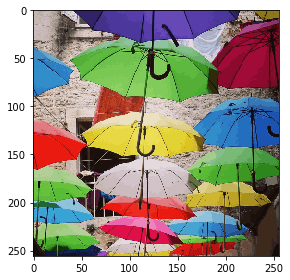

In [249]:
umbrella_kmeans_128 = KMeans(n_clusters=128)
umbrella_kmeans_128.fit(umbrella_array)

umbrella_kmeans_128_compressed = umbrella_kmeans_128.cluster_centers_[umbrella_kmeans_128.labels_]
umbrella_kmeans_128_compressed = np.clip(umbrella_kmeans_128_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_128_compressed = umbrella_kmeans_128_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_128_compressed.png", umbrella_kmeans_128_compressed)
io.imshow(umbrella_kmeans_128_compressed)
io.show()

In [250]:
umbrella_kmeans_128_bytes = image_bytes("umbrella_kmeans_128_compressed.png")
umbrella_bytes.append(umbrella_kmeans_128_bytes)
print("umbrella_kmeans_128 bytes", umbrella_kmeans_128_bytes)

umbrella_kmeans_128 bytes 69733


### umbrella.png k=64

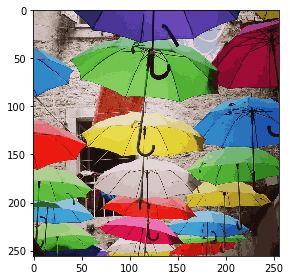

In [251]:
umbrella_kmeans_64 = KMeans(n_clusters=64)
umbrella_kmeans_64.fit(umbrella_array)

umbrella_kmeans_64_compressed = umbrella_kmeans_64.cluster_centers_[umbrella_kmeans_64.labels_]
umbrella_kmeans_64_compressed = np.clip(umbrella_kmeans_64_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_64_compressed = umbrella_kmeans_64_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_64_compressed.png", umbrella_kmeans_64_compressed)
io.imshow(umbrella_kmeans_64_compressed)
io.show()

In [252]:
umbrella_kmeans_64_bytes = image_bytes("umbrella_kmeans_64_compressed.png")
umbrella_bytes.append(umbrella_kmeans_64_bytes)
print("umbrella_kmeans_64 bytes", umbrella_kmeans_64_bytes)

umbrella_kmeans_64 bytes 51491


### umbrella.png k=32

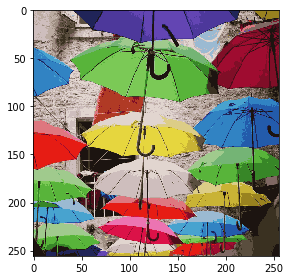

In [253]:
umbrella_kmeans_32 = KMeans(n_clusters=32)
umbrella_kmeans_32.fit(umbrella_array)

umbrella_kmeans_32_compressed = umbrella_kmeans_32.cluster_centers_[umbrella_kmeans_32.labels_]
umbrella_kmeans_32_compressed = np.clip(umbrella_kmeans_32_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_32_compressed = umbrella_kmeans_32_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_32_compressed.png", umbrella_kmeans_32_compressed)
io.imshow(umbrella_kmeans_32_compressed)
io.show()

In [254]:
umbrella_kmeans_32_bytes = image_bytes("umbrella_kmeans_32_compressed.png")
umbrella_bytes.append(umbrella_kmeans_32_bytes)
print("umbrella kmeans_32 bytes", umbrella_kmeans_32_bytes)

umbrella kmeans_32 bytes 35859


### umbrella.png k=16

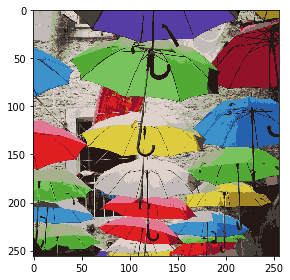

In [255]:
umbrella_kmeans_16 = KMeans(n_clusters=16)
umbrella_kmeans_16.fit(umbrella_array)

umbrella_kmeans_16_compressed = umbrella_kmeans_16.cluster_centers_[umbrella_kmeans_16.labels_]
umbrella_kmeans_16_compressed = np.clip(umbrella_kmeans_16_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_16_compressed = umbrella_kmeans_16_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_16_compressed.png", umbrella_kmeans_16_compressed)
io.imshow(umbrella_kmeans_16_compressed)
io.show()

In [256]:
umbrella_kmeans_16_bytes = image_bytes("umbrella_kmeans_16_compressed.png")
umbrella_bytes.append(umbrella_kmeans_16_bytes)
print("umbrella_kmeans_16 bytes", umbrella_kmeans_16_bytes)

umbrella_kmeans_16 bytes 26995


### umbrella.png k=8

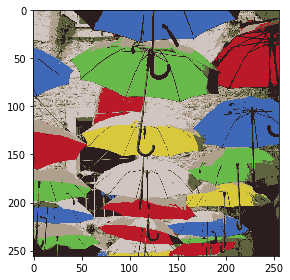

In [257]:
umbrella_kmeans_8 = KMeans(n_clusters=8)
umbrella_kmeans_8.fit(umbrella_array)

umbrella_kmeans_8_compressed = umbrella_kmeans_8.cluster_centers_[umbrella_kmeans_8.labels_]
umbrella_kmeans_8_compressed = np.clip(umbrella_kmeans_8_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_8_compressed = umbrella_kmeans_8_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_8_compressed.png", umbrella_kmeans_8_compressed)
io.imshow(umbrella_kmeans_8_compressed)
io.show()

In [258]:
umbrella_kmeans_8_bytes = image_bytes("umbrella_kmeans_8_compressed.png")
umbrella_bytes.append(umbrella_kmeans_8_bytes)
print("umbrella_kmeans_8 bytes", umbrella_kmeans_8_bytes)

umbrella_kmeans_8 bytes 17416


### umbrella.png k=4

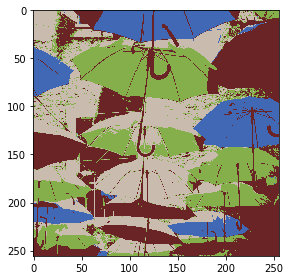

In [259]:
umbrella_kmeans_4 = KMeans(n_clusters=4)
umbrella_kmeans_4.fit(umbrella_array)

umbrella_kmeans_4_compressed = umbrella_kmeans_4.cluster_centers_[umbrella_kmeans_4.labels_]
umbrella_kmeans_4_compressed = np.clip(umbrella_kmeans_4_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_4_compressed = umbrella_kmeans_4_compressed.reshape(umbrella_rows,umbrella_cols,3)

io.imsave("umbrella_kmeans_4_compressed.png", umbrella_kmeans_4_compressed)
io.imshow(umbrella_kmeans_4_compressed)
io.show()

In [260]:
umbrella_kmeans_4_bytes = image_bytes("umbrella_kmeans_4_compressed.png")
umbrella_bytes.append(umbrella_kmeans_4_bytes)
print("umbrella_kmeans_4 bytes", umbrella_kmeans_4_bytes)

umbrella_kmeans_4 bytes 11125


### umbrella.png k=2

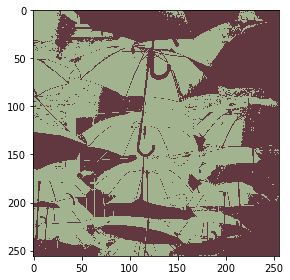

In [261]:
umbrella_kmeans_2 = KMeans(n_clusters=2)
umbrella_kmeans_2.fit(umbrella_array)

umbrella_kmeans_2_compressed = umbrella_kmeans_2.cluster_centers_[umbrella_kmeans_2.labels_]
umbrella_kmeans_2_compressed = np.clip(umbrella_kmeans_2_compressed.astype('uint8'), 0, 255)
umbrella_kmeans_2_compressed = umbrella_kmeans_2_compressed.reshape(umbrella_rows, umbrella_cols,3)

io.imsave("umbrella_kmeans_2_compressed.png", umbrella_kmeans_2_compressed)
io.imshow(umbrella_kmeans_2_compressed)
io.show()

In [262]:
umbrella_kmeans_2_bytes = image_bytes("umbrella_kmeans_2_compressed.png")
umbrella_bytes.append(umbrella_kmeans_2_bytes)
print("umbrella_kmeans_2 bytes", umbrella_kmeans_2_bytes)

umbrella_kmeans_2 bytes 6522


In [263]:
umbrella_bytes

[83962, 69733, 51491, 35859, 26995, 17416, 11125, 6522]

# graffiti.png 

In [264]:
graffiti

array([[[241, 142,  85],
        [245, 146,  89],
        [250, 150,  91],
        ...,
        [ 83, 111,  97],
        [ 92, 127, 107],
        [ 80, 111,  93]],

       [[250, 148,  87],
        [251, 148,  88],
        [237, 137,  78],
        ...,
        [ 96, 133, 115],
        [ 85, 113,  91],
        [ 63,  86,  66]],

       [[255, 153,  93],
        [251, 153,  92],
        [251, 151,  92],
        ...,
        [ 89, 117, 100],
        [ 59,  80,  65],
        [ 56,  77,  62]],

       ...,

       [[ 88,  60,  38],
        [ 84,  56,  34],
        [ 81,  53,  32],
        ...,
        [ 42,  37,  34],
        [ 36,  30,  32],
        [ 40,  34,  36]],

       [[ 76,  51,  31],
        [ 78,  53,  33],
        [ 80,  57,  39],
        ...,
        [ 62,  43,  39],
        [ 44,  35,  36],
        [ 38,  34,  33]],

       [[ 63,  49,  30],
        [ 72,  53,  36],
        [ 75,  56,  42],
        ...,
        [ 75,  48,  39],
        [ 58,  37,  32],
        [ 44,  33,  30]]

In [265]:
graffiti_bytes = []
graffiti_ucolors = []
graffiti_wcss = []
graffiti_bcss = []
graffiti_silhouette = []

### graffiti.png k=256

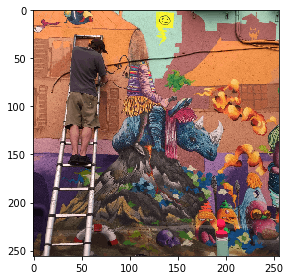

In [266]:
graffiti_kmeans_256 = KMeans(n_clusters=256)
graffiti_kmeans_256.fit(graffiti_array)

graffiti_kmeans_256_compressed = graffiti_kmeans_256.cluster_centers_[graffiti_kmeans_256.labels_]
graffiti_kmeans_256_compressed = np.clip(graffiti_kmeans_256_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_256_compressed = graffiti_kmeans_256_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_256_compressed.png", graffiti_kmeans_256_compressed)
io.imshow(graffiti_kmeans_256_compressed)
io.show()

In [267]:
graffiti_kmeans_256_bytes = image_bytes("graffiti_kmeans_256_compressed.png")
graffiti_bytes.append(graffiti_kmeans_256_bytes)
print("graffiti_kmeans_256 bytes", graffiti_kmeans_256_bytes)

graffiti_kmeans_256 bytes 115419


### graffiti.png k=128

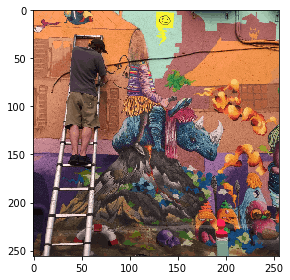

In [268]:
graffiti_kmeans_128 = KMeans(n_clusters=128)
graffiti_kmeans_128.fit(graffiti_array)

graffiti_kmeans_128_compressed = graffiti_kmeans_128.cluster_centers_[graffiti_kmeans_128.labels_]
graffiti_kmeans_128_compressed = np.clip(graffiti_kmeans_128_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_128_compressed = graffiti_kmeans_128_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_128_compressed.png", graffiti_kmeans_128_compressed)
io.imshow(graffiti_kmeans_128_compressed)
io.show()

In [269]:
graffiti_kmeans_128_bytes = image_bytes("graffiti_kmeans_128_compressed.png")
graffiti_bytes.append(graffiti_kmeans_128_bytes)
print("graffiti_kmeans_128 bytes", graffiti_kmeans_128_bytes)

graffiti_kmeans_128 bytes 96728


### graffiti.png k=64

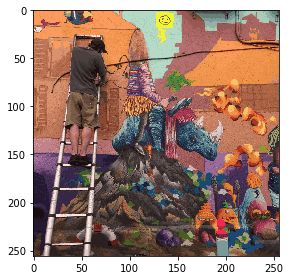

In [270]:
graffiti_kmeans_64 = KMeans(n_clusters=64)
graffiti_kmeans_64.fit(graffiti_array)

graffiti_kmeans_64_compressed = graffiti_kmeans_64.cluster_centers_[graffiti_kmeans_64.labels_]
graffiti_kmeans_64_compressed = np.clip(graffiti_kmeans_64_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_64_compressed = graffiti_kmeans_64_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_64_compressed.png", graffiti_kmeans_64_compressed)
io.imshow(graffiti_kmeans_64_compressed)
io.show()

In [271]:
graffiti_kmeans_64_bytes = image_bytes("graffiti_kmeans_64_compressed.png")
graffiti_bytes.append(graffiti_kmeans_64_bytes)
print("graffiti_kmeans_64 bytes", graffiti_kmeans_64_bytes)

graffiti_kmeans_64 bytes 78329


### graffiti.png k=32

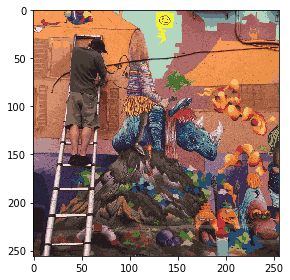

In [272]:
graffiti_kmeans_32 = KMeans(n_clusters=32)
graffiti_kmeans_32.fit(graffiti_array)

graffiti_kmeans_32_compressed = graffiti_kmeans_32.cluster_centers_[graffiti_kmeans_32.labels_]
graffiti_kmeans_32_compressed = np.clip(graffiti_kmeans_32_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_32_compressed = graffiti_kmeans_32_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_32_compressed.png", graffiti_kmeans_32_compressed)
io.imshow(graffiti_kmeans_32_compressed)
io.show()


In [273]:
graffiti_kmeans_32_bytes = image_bytes("graffiti_kmeans_32_compressed.png")
graffiti_bytes.append(graffiti_kmeans_32_bytes)
print("graffiti_kmeans_22 bytes", graffiti_kmeans_32_bytes)

graffiti_kmeans_22 bytes 61957


### graffiti.png k=16

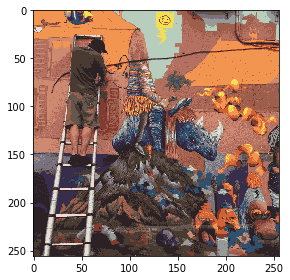

In [274]:
graffiti_kmeans_16 = KMeans(n_clusters=16)
graffiti_kmeans_16.fit(graffiti_array)

graffiti_kmeans_16_compressed = graffiti_kmeans_16.cluster_centers_[graffiti_kmeans_16.labels_]
graffiti_kmeans_16_compressed = np.clip(graffiti_kmeans_16_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_16_compressed = graffiti_kmeans_16_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_16_compressed.png", graffiti_kmeans_16_compressed)
io.imshow(graffiti_kmeans_16_compressed)
io.show()

In [275]:
graffiti_kmeans_16_bytes = image_bytes("graffiti_kmeans_16_compressed.png")
graffiti_bytes.append(graffiti_kmeans_16_bytes)
print("graffiti_kmeans_16 bytes", graffiti_kmeans_16_bytes)

graffiti_kmeans_16 bytes 43509


### graffiti.png k=8

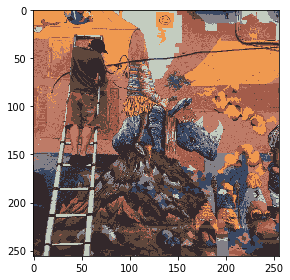

In [276]:
graffiti_kmeans_8 = KMeans(n_clusters=8)
graffiti_kmeans_8.fit(graffiti_array)

graffiti_kmeans_8_compressed = graffiti_kmeans_8.cluster_centers_[graffiti_kmeans_8.labels_]
graffiti_kmeans_8_compressed = np.clip(graffiti_kmeans_8_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_8_compressed = graffiti_kmeans_8_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_8_compressed.png", graffiti_kmeans_8_compressed)
io.imshow(graffiti_kmeans_8_compressed)
io.show()

In [277]:
graffiti_kmeans_8_bytes = image_bytes("graffiti_kmeans_8_compressed.png")
graffiti_bytes.append(graffiti_kmeans_8_bytes)
print("graffiti_kmeans_8 bytes", graffiti_kmeans_8_bytes)

graffiti_kmeans_8 bytes 28070


### graffiti.png k=4

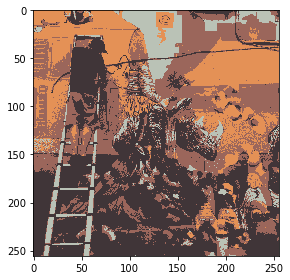

In [278]:
graffiti_kmeans_4 = KMeans(n_clusters=4)
graffiti_kmeans_4.fit(graffiti_array)

graffiti_kmeans_4_compressed = graffiti_kmeans_4.cluster_centers_[graffiti_kmeans_4.labels_]
graffiti_kmeans_4_compressed = np.clip(graffiti_kmeans_4_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_4_compressed = graffiti_kmeans_4_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_4_compressed.png", graffiti_kmeans_4_compressed)
io.imshow(graffiti_kmeans_4_compressed)
io.show()

In [279]:
graffiti_kmeans_4_bytes = image_bytes("graffiti_kmeans_4_compressed.png")
graffiti_bytes.append(graffiti_kmeans_4_bytes)
print("graffiti_kmeans_4 bytes", graffiti_kmeans_4_bytes)

graffiti_kmeans_4 bytes 14870


### graffiti.png k=2

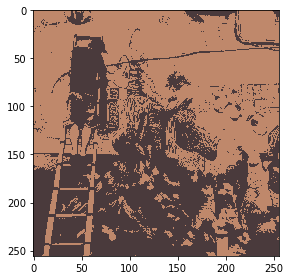

In [280]:
graffiti_kmeans_2 = KMeans(n_clusters=2)
graffiti_kmeans_2.fit(graffiti_array)

graffiti_kmeans_2_compressed = graffiti_kmeans_2.cluster_centers_[graffiti_kmeans_2.labels_]
graffiti_kmeans_2_compressed = np.clip(graffiti_kmeans_2_compressed.astype('uint8'), 0, 255)
graffiti_kmeans_2_compressed = graffiti_kmeans_2_compressed.reshape(graffiti_rows,graffiti_cols,3)

io.imsave("graffiti_kmeans_2_compressed.png", graffiti_kmeans_2_compressed)
io.imshow(graffiti_kmeans_2_compressed)
io.show()

In [281]:
graffiti_kmeans_2_bytes = image_bytes("graffiti_kmeans_2_compressed.png")
graffiti_bytes.append(graffiti_kmeans_2_bytes)
print("graffiti_kmeans_2 bytes", graffiti_kmeans_2_bytes)

graffiti_kmeans_2 bytes 7897


In [282]:
graffiti_bytes

[115419, 96728, 78329, 61957, 43509, 28070, 14870, 7897]

# WCSS

In [143]:
baboon_256_wcss=wcss(baboon_array, baboon_kmeans_256.cluster_centers_[baboon_kmeans_256.labels_])
baboon_wcss.append(baboon_256_wcss)
baboon_128_wcss=wcss(baboon_array, baboon_kmeans_128.cluster_centers_[baboon_kmeans_128.labels_])
baboon_wcss.append(baboon_128_wcss)
baboon_64_wcss=wcss(baboon_array, baboon_kmeans_64.cluster_centers_[baboon_kmeans_64.labels_])
baboon_wcss.append(baboon_64_wcss)
baboon_32_wcss=wcss(baboon_array, baboon_kmeans_32.cluster_centers_[baboon_kmeans_32.labels_])
baboon_wcss.append(baboon_32_wcss)
baboon_16_wcss=wcss(baboon_array, baboon_kmeans_16.cluster_centers_[baboon_kmeans_16.labels_])
baboon_wcss.append(baboon_16_wcss)
baboon_8_wcss=wcss(baboon_array, baboon_kmeans_8.cluster_centers_[baboon_kmeans_8.labels_])
baboon_wcss.append(baboon_8_wcss)
baboon_4_wcss=wcss(baboon_array, baboon_kmeans_4.cluster_centers_[baboon_kmeans_4.labels_])
baboon_wcss.append(baboon_4_wcss)
baboon_2_wcss=wcss(baboon_array, baboon_kmeans_2.cluster_centers_[baboon_kmeans_2.labels_])
baboon_wcss.append(baboon_2_wcss)

In [144]:
baboon_wcss

[72.02636584423067,
 113.22769756854795,
 179.71127870426884,
 295.8922822948866,
 522.7323253999758,
 966.0842742907365,
 1881.7487453908811,
 4633.811167367665]

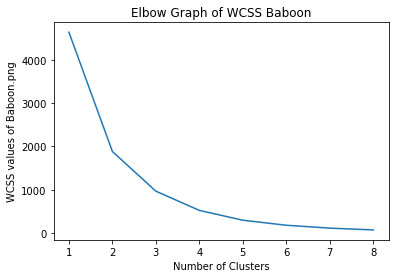

In [145]:
baboon_wcss.reverse()
plt.plot(range(1,9), baboon_wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values of Baboon.png') 
plt.title("Elbow Graph of WCSS Baboon")
plt.show()

In [302]:
flowers_256_wcss=wcss(flowers_array, flowers_kmeans_256.cluster_centers_[flowers_kmeans_256.labels_])
flowers_wcss.append(flowers_256_wcss)
flowers_128_wcss=wcss(flowers_array, flowers_kmeans_128.cluster_centers_[flowers_kmeans_128.labels_])
flowers_wcss.append(flowers_128_wcss)
flowers_64_wcss=wcss(flowers_array, flowers_kmeans_64.cluster_centers_[flowers_kmeans_64.labels_])
flowers_wcss.append(flowers_64_wcss)
flowers_32_wcss=wcss(flowers_array, flowers_kmeans_32.cluster_centers_[flowers_kmeans_32.labels_])
flowers_wcss.append(flowers_32_wcss)
flowers_16_wcss=wcss(flowers_array, flowers_kmeans_16.cluster_centers_[flowers_kmeans_16.labels_])
flowers_wcss.append(flowers_16_wcss)
flowers_8_wcss=wcss(flowers_array, flowers_kmeans_8.cluster_centers_[flowers_kmeans_8.labels_])
flowers_wcss.append(flowers_8_wcss)
flowers_4_wcss=wcss(flowers_array, flowers_kmeans_4.cluster_centers_[flowers_kmeans_4.labels_])
flowers_wcss.append(flowers_4_wcss)
flowers_2_wcss=wcss(flowers_array, flowers_kmeans_2.cluster_centers_[flowers_kmeans_2.labels_])
flowers_wcss.append(flowers_2_wcss)

In [303]:
flowers_wcss

[141.8700958667507,
 233.31115108382028,
 384.76267921243226,
 651.1523162203666,
 1154.6368623649475,
 2128.0810960084386,
 3930.1053162252965,
 7451.615351697591]

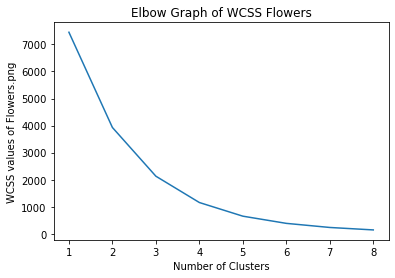

In [148]:
flowers_wcss.reverse()
plt.plot(range(1,9), flowers_wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values of Flowers.png') 
plt.title("Elbow Graph of WCSS Flowers")
plt.show()

In [312]:
lena_256_wcss=wcss(lena_array, lena_kmeans_256.cluster_centers_[lena_kmeans_256.labels_])
lena_wcss.append(lena_256_wcss)
lena_128_wcss=wcss(lena_array, lena_kmeans_128.cluster_centers_[lena_kmeans_128.labels_])
lena_wcss.append(lena_128_wcss)
lena_64_wcss=wcss(lena_array, lena_kmeans_64.cluster_centers_[lena_kmeans_64.labels_])
lena_wcss.append(lena_64_wcss)
lena_32_wcss=wcss(lena_array, lena_kmeans_32.cluster_centers_[lena_kmeans_32.labels_])
lena_wcss.append(lena_32_wcss)
lena_16_wcss=wcss(lena_array, lena_kmeans_16.cluster_centers_[lena_kmeans_16.labels_])
lena_wcss.append(lena_16_wcss)
lena_8_wcss=wcss(lena_array, lena_kmeans_8.cluster_centers_[lena_kmeans_8.labels_])
lena_wcss.append(lena_8_wcss)
lena_4_wcss=wcss(lena_array, lena_kmeans_4.cluster_centers_[lena_kmeans_4.labels_])
lena_wcss.append(lena_4_wcss)
lena_2_wcss=wcss(lena_array, lena_kmeans_2.cluster_centers_[lena_kmeans_2.labels_])
lena_wcss.append(lena_2_wcss)

In [150]:
lena_wcss

[22.81423036099358,
 36.22294751175997,
 58.604863718555414,
 100.41045990904351,
 187.8914155060998,
 374.21750332788434,
 786.4401757920705,
 2242.2533221073713]

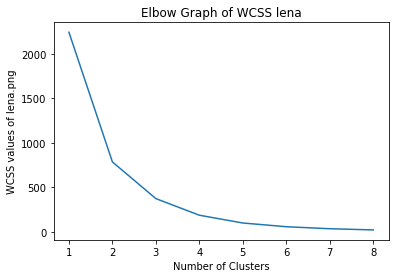

In [151]:
lena_wcss.reverse()
plt.plot(range(1,9), lena_wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values of lena.png') 
plt.title("Elbow Graph of WCSS lena")
plt.show()

In [313]:
umbrella_256_wcss=wcss(umbrella_array, umbrella_kmeans_256.cluster_centers_[umbrella_kmeans_256.labels_])
umbrella_wcss.append(umbrella_256_wcss)
umbrella_128_wcss=wcss(umbrella_array, umbrella_kmeans_128.cluster_centers_[umbrella_kmeans_128.labels_])
umbrella_wcss.append(umbrella_128_wcss)
umbrella_64_wcss=wcss(umbrella_array, umbrella_kmeans_64.cluster_centers_[umbrella_kmeans_64.labels_])
umbrella_wcss.append(umbrella_64_wcss)
umbrella_32_wcss=wcss(umbrella_array, umbrella_kmeans_32.cluster_centers_[umbrella_kmeans_32.labels_])
umbrella_wcss.append(umbrella_32_wcss)
umbrella_16_wcss=wcss(umbrella_array, umbrella_kmeans_16.cluster_centers_[umbrella_kmeans_16.labels_])
umbrella_wcss.append(umbrella_16_wcss)
umbrella_8_wcss=wcss(umbrella_array, umbrella_kmeans_8.cluster_centers_[umbrella_kmeans_8.labels_])
umbrella_wcss.append(umbrella_8_wcss)
umbrella_4_wcss=wcss(umbrella_array, umbrella_kmeans_4.cluster_centers_[umbrella_kmeans_4.labels_])
umbrella_wcss.append(umbrella_4_wcss)
umbrella_2_wcss=wcss(umbrella_array, umbrella_kmeans_2.cluster_centers_[umbrella_kmeans_2.labels_])
umbrella_wcss.append(umbrella_2_wcss)

In [153]:
umbrella_wcss

[69.99873390714049,
 119.10404275872925,
 217.72863568054814,
 423.6057183542247,
 876.2591598491019,
 1823.4891261091482,
 4296.212307002102,
 8256.57309950789]

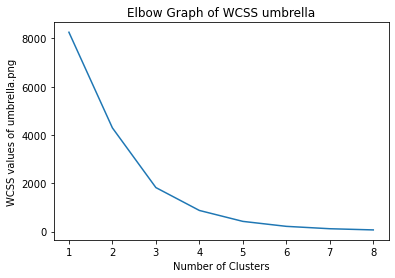

In [154]:
umbrella_wcss.reverse()
plt.plot(range(1,9), umbrella_wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values of umbrella.png') 
plt.title("Elbow Graph of WCSS umbrella")
plt.show()

In [314]:
graffiti_256_wcss=wcss(graffiti_array, graffiti_kmeans_256.cluster_centers_[graffiti_kmeans_256.labels_])
graffiti_wcss.append(graffiti_256_wcss)
graffiti_128_wcss=wcss(graffiti_array, graffiti_kmeans_128.cluster_centers_[graffiti_kmeans_128.labels_])
graffiti_wcss.append(graffiti_128_wcss)
graffiti_64_wcss=wcss(graffiti_array, graffiti_kmeans_64.cluster_centers_[graffiti_kmeans_64.labels_])
graffiti_wcss.append(graffiti_64_wcss)
graffiti_32_wcss=wcss(graffiti_array, graffiti_kmeans_32.cluster_centers_[graffiti_kmeans_32.labels_])
graffiti_wcss.append(graffiti_32_wcss)
graffiti_16_wcss=wcss(graffiti_array, graffiti_kmeans_16.cluster_centers_[graffiti_kmeans_16.labels_])
graffiti_wcss.append(graffiti_16_wcss)
graffiti_8_wcss=wcss(graffiti_array, graffiti_kmeans_8.cluster_centers_[graffiti_kmeans_8.labels_])
graffiti_wcss.append(graffiti_8_wcss)
graffiti_4_wcss=wcss(graffiti_array, graffiti_kmeans_4.cluster_centers_[graffiti_kmeans_4.labels_])
graffiti_wcss.append(graffiti_4_wcss)
graffiti_2_wcss=wcss(graffiti_array, graffiti_kmeans_2.cluster_centers_[graffiti_kmeans_2.labels_])
graffiti_wcss.append(graffiti_2_wcss)

In [156]:
graffiti_wcss

[60.82129643454056,
 102.50615017133109,
 180.925112816249,
 325.7861890608261,
 587.7340842540132,
 988.8091760863757,
 1764.5488470373277,
 3561.977984152802]

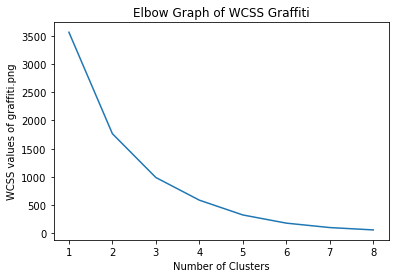

In [157]:
graffiti_wcss.reverse()
plt.plot(range(1,9), graffiti_wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values of graffiti.png') 
plt.title("Elbow Graph of WCSS Graffiti")
plt.show()

# BCSS

In [315]:
baboon_256_bcss=bcss(baboon_array, baboon_kmeans_256.cluster_centers_[baboon_kmeans_256.labels_])
baboon_bcss.append(baboon_256_bcss)
baboon_128_bcss=bcss(baboon_array, baboon_kmeans_128.cluster_centers_[baboon_kmeans_128.labels_])
baboon_bcss.append(baboon_128_bcss)
baboon_64_bcss=bcss(baboon_array, baboon_kmeans_64.cluster_centers_[baboon_kmeans_64.labels_])
baboon_bcss.append(baboon_64_bcss)
baboon_32_bcss=bcss(baboon_array, baboon_kmeans_32.cluster_centers_[baboon_kmeans_32.labels_])
baboon_bcss.append(baboon_32_bcss)
baboon_16_bcss=bcss(baboon_array, baboon_kmeans_16.cluster_centers_[baboon_kmeans_16.labels_])
baboon_bcss.append(baboon_16_bcss)
baboon_8_bcss=bcss(baboon_array, baboon_kmeans_8.cluster_centers_[baboon_kmeans_8.labels_])
baboon_bcss.append(baboon_8_bcss)
baboon_4_bcss=bcss(baboon_array, baboon_kmeans_4.cluster_centers_[baboon_kmeans_4.labels_])
baboon_bcss.append(baboon_4_bcss)
baboon_2_bcss=bcss(baboon_array, baboon_kmeans_2.cluster_centers_[baboon_kmeans_2.labels_])
baboon_bcss.append(baboon_2_bcss)

baboon_bcss

[15096737200305.375,
 26965025056751.832,
 30897903253790.543,
 32791091397379.1,
 33742788819234.965,
 34239418047680.094,
 34528116854710.285,
 34701382279625.582,
 34702806477083.836,
 34525891483200.18,
 34230604641066.1,
 33745413277980.625,
 32768553516188.918,
 30885327333984.66,
 26955320571235.35,
 15127670311007.145]

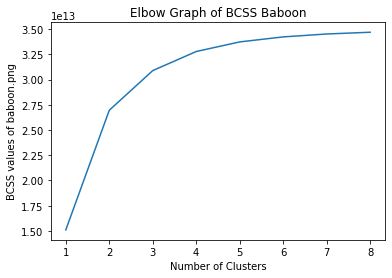

In [159]:
baboon_bcss.reverse()
plt.plot(range(1,9), baboon_bcss)
plt.xlabel('Number of Clusters')
plt.ylabel('BCSS values of baboon.png') 
plt.title("Elbow Graph of BCSS Baboon")
plt.show()

In [316]:
flowers_256_bcss=bcss(flowers_array, flowers_kmeans_256.cluster_centers_[flowers_kmeans_256.labels_])
flowers_bcss.append(flowers_256_bcss)
flowers_128_bcss=bcss(flowers_array, flowers_kmeans_128.cluster_centers_[flowers_kmeans_128.labels_])
flowers_bcss.append(flowers_128_bcss)
flowers_64_bcss=bcss(flowers_array, flowers_kmeans_64.cluster_centers_[flowers_kmeans_64.labels_])
flowers_bcss.append(flowers_64_bcss)
flowers_32_bcss=bcss(flowers_array, flowers_kmeans_32.cluster_centers_[flowers_kmeans_32.labels_])
flowers_bcss.append(flowers_32_bcss)
flowers_16_bcss=bcss(flowers_array, flowers_kmeans_16.cluster_centers_[flowers_kmeans_16.labels_])
flowers_bcss.append(flowers_16_bcss)
flowers_8_bcss=bcss(flowers_array, flowers_kmeans_8.cluster_centers_[flowers_kmeans_8.labels_])
flowers_bcss.append(flowers_8_bcss)
flowers_4_bcss=bcss(flowers_array, flowers_kmeans_4.cluster_centers_[flowers_kmeans_4.labels_])
flowers_bcss.append(flowers_4_bcss)
flowers_2_bcss=bcss(flowers_array, flowers_kmeans_2.cluster_centers_[flowers_kmeans_2.labels_])
flowers_bcss.append(flowers_2_bcss)

flowers_bcss

[74397258378951.97,
 74003391588933.66,
 73342986862132.12,
 72208369753343.02,
 70051873064638.66,
 65844285406827.664,
 58153783351506.234,
 42995312651981.56,
 74397258378951.97,
 74003391588933.66,
 73342986862132.12,
 72208369753343.02,
 70051873064638.66,
 65844285406827.664,
 58153783351506.234,
 42995312651981.56]

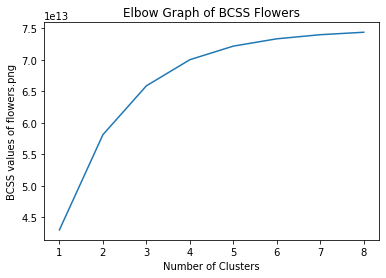

In [161]:
flowers_bcss.reverse()
plt.plot(range(1,9), flowers_bcss)
plt.xlabel('Number of Clusters')
plt.ylabel('BCSS values of flowers.png') 
plt.title("Elbow Graph of BCSS Flowers")
plt.show()

In [317]:
lena_256_bcss=bcss(lena_array, lena_kmeans_256.cluster_centers_[lena_kmeans_256.labels_])
lena_bcss.append(lena_256_bcss)
lena_128_bcss=bcss(lena_array, lena_kmeans_128.cluster_centers_[lena_kmeans_128.labels_])
lena_bcss.append(lena_128_bcss)
lena_64_bcss=bcss(lena_array, lena_kmeans_64.cluster_centers_[lena_kmeans_64.labels_])
lena_bcss.append(lena_64_bcss)
lena_32_bcss=bcss(lena_array, lena_kmeans_32.cluster_centers_[lena_kmeans_32.labels_])
lena_bcss.append(lena_32_bcss)
lena_16_bcss=bcss(lena_array, lena_kmeans_16.cluster_centers_[lena_kmeans_16.labels_])
lena_bcss.append(lena_16_bcss)
lena_8_bcss=bcss(lena_array, lena_kmeans_8.cluster_centers_[lena_kmeans_8.labels_])
lena_bcss.append(lena_8_bcss)
lena_4_bcss=bcss(lena_array, lena_kmeans_4.cluster_centers_[lena_kmeans_4.labels_])
lena_bcss.append(lena_4_bcss)
lena_2_bcss=bcss(lena_array, lena_kmeans_2.cluster_centers_[lena_kmeans_2.labels_])
lena_bcss.append(lena_2_bcss)

lena_bcss

[26582279102527.406,
 26521305037642.965,
 26424880301441.605,
 26244531097447.8,
 25872378863487.227,
 25083852048633.63,
 23328197266465.293,
 17051608179081.371]

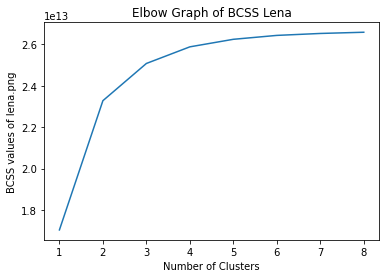

In [163]:
lena_bcss.reverse()
plt.plot(range(1,9), lena_bcss)
plt.xlabel('Number of Clusters')
plt.ylabel('BCSS values of lena.png') 
plt.title("Elbow Graph of BCSS Lena")
plt.show()

In [318]:
umbrella_256_bcss=bcss(umbrella_array, umbrella_kmeans_256.cluster_centers_[umbrella_kmeans_256.labels_])
umbrella_bcss.append(umbrella_256_bcss)
umbrella_128_bcss=bcss(umbrella_array, umbrella_kmeans_128.cluster_centers_[umbrella_kmeans_128.labels_])
umbrella_bcss.append(umbrella_128_bcss)
umbrella_64_bcss=bcss(umbrella_array, umbrella_kmeans_64.cluster_centers_[umbrella_kmeans_64.labels_])
umbrella_bcss.append(umbrella_64_bcss)
umbrella_32_bcss=bcss(umbrella_array, umbrella_kmeans_32.cluster_centers_[umbrella_kmeans_32.labels_])
umbrella_bcss.append(umbrella_32_bcss)
umbrella_16_bcss=bcss(umbrella_array, umbrella_kmeans_16.cluster_centers_[umbrella_kmeans_16.labels_])
umbrella_bcss.append(umbrella_16_bcss)
umbrella_8_bcss=bcss(umbrella_array, umbrella_kmeans_8.cluster_centers_[umbrella_kmeans_8.labels_])
umbrella_bcss.append(umbrella_8_bcss)
umbrella_4_bcss=bcss(umbrella_array, umbrella_kmeans_4.cluster_centers_[umbrella_kmeans_4.labels_])
umbrella_bcss.append(umbrella_4_bcss)
umbrella_2_bcss=bcss(umbrella_array, umbrella_kmeans_2.cluster_centers_[umbrella_kmeans_2.labels_])
umbrella_bcss.append(umbrella_2_bcss)

umbrella_bcss

[62501680197683.195,
 62297195341357.28,
 61852780281755.695,
 60966880456357.77,
 59012316591873.14,
 54953275757326.266,
 44365017705288.8,
 27329515243638.836]

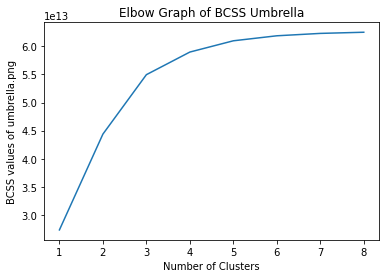

In [165]:
umbrella_bcss.reverse()
plt.plot(range(1,9), umbrella_bcss)
plt.xlabel('Number of Clusters')
plt.ylabel('BCSS values of umbrella.png') 
plt.title("Elbow Graph of BCSS Umbrella")
plt.show()

In [319]:
graffiti_256_bcss=bcss(graffiti_array, graffiti_kmeans_256.cluster_centers_[graffiti_kmeans_256.labels_])
graffiti_bcss.append(graffiti_256_bcss)
graffiti_128_bcss=bcss(graffiti_array, graffiti_kmeans_128.cluster_centers_[graffiti_kmeans_128.labels_])
graffiti_bcss.append(graffiti_128_bcss)
graffiti_64_bcss=bcss(graffiti_array, graffiti_kmeans_64.cluster_centers_[graffiti_kmeans_64.labels_])
graffiti_bcss.append(graffiti_64_bcss)
graffiti_32_bcss=bcss(graffiti_array, graffiti_kmeans_32.cluster_centers_[graffiti_kmeans_32.labels_])
graffiti_bcss.append(graffiti_32_bcss)
graffiti_16_bcss=bcss(graffiti_array, graffiti_kmeans_16.cluster_centers_[graffiti_kmeans_16.labels_])
graffiti_bcss.append(graffiti_16_bcss)
graffiti_8_bcss=bcss(graffiti_array, graffiti_kmeans_8.cluster_centers_[graffiti_kmeans_8.labels_])
graffiti_bcss.append(graffiti_8_bcss)
graffiti_4_bcss=bcss(graffiti_array, graffiti_kmeans_4.cluster_centers_[graffiti_kmeans_4.labels_])
graffiti_bcss.append(graffiti_4_bcss)
graffiti_2_bcss=bcss(graffiti_array, graffiti_kmeans_2.cluster_centers_[graffiti_kmeans_2.labels_])
graffiti_bcss.append(graffiti_2_bcss)

graffiti_bcss

[38656231495276.336,
 38472754159848.555,
 38142711754030.14,
 37506153838297.586,
 36367616380955.17,
 34657357352151.223,
 31331009373166.453,
 23621653352614.3]

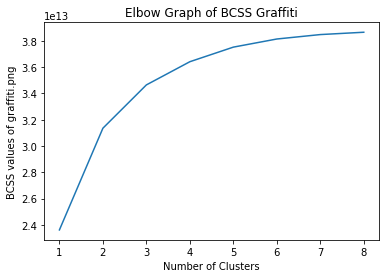

In [167]:
graffiti_bcss.reverse()
plt.plot(range(1,9), graffiti_bcss)
plt.xlabel('Number of Clusters')
plt.ylabel('BCSS values of graffiti.png') 
plt.title("Elbow Graph of BCSS Graffiti")
plt.show()

# Silhouette Score

In [168]:
baboon_kmeans_256 = metrics.silhouette_score(baboon_array, baboon_kmeans_256.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_256)
baboon_kmeans_128 = metrics.silhouette_score(baboon_array, baboon_kmeans_128.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_128)
baboon_kmeans_64 = metrics.silhouette_score(baboon_array, baboon_kmeans_64.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_64)
baboon_kmeans_32 = metrics.silhouette_score(baboon_array, baboon_kmeans_32.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_32)
baboon_kmeans_16 = metrics.silhouette_score(baboon_array, baboon_kmeans_16.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_16)
baboon_kmeans_8 = metrics.silhouette_score(baboon_array, baboon_kmeans_8.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_8)
baboon_kmeans_4 = metrics.silhouette_score(baboon_array, baboon_kmeans_4.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_4)
baboon_kmeans_2 = metrics.silhouette_score(baboon_array, baboon_kmeans_2.labels_, metric='euclidean')
baboon_silhouette.append(baboon_kmeans_2)

baboon_silhouette

[0.23460025333430798,
 0.24481721520702104,
 0.2631916984151084,
 0.30371901093776515,
 0.32518712313196346,
 0.36420650997094006,
 0.42604712896817715,
 0.3868510170082722]

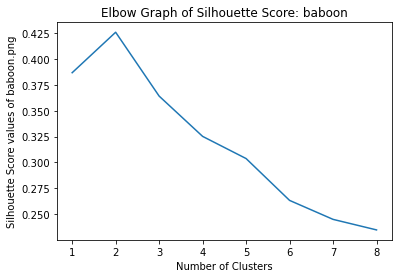

In [169]:
baboon_silhouette.reverse()
plt.plot(range(1,9), baboon_silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score values of baboon.png') 
plt.title("Elbow Graph of Silhouette Score: baboon")
plt.show()

In [170]:
flowers_kmeans_256 = metrics.silhouette_score(flowers_array, flowers_kmeans_256.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_256)
flowers_kmeans_128 = metrics.silhouette_score(flowers_array, flowers_kmeans_128.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_128)
flowers_kmeans_64 = metrics.silhouette_score(flowers_array, flowers_kmeans_64.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_64)
flowers_kmeans_32 = metrics.silhouette_score(flowers_array, flowers_kmeans_32.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_32)
flowers_kmeans_16 = metrics.silhouette_score(flowers_array, flowers_kmeans_16.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_16)
flowers_kmeans_8 = metrics.silhouette_score(flowers_array, flowers_kmeans_8.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_8)
flowers_kmeans_4 = metrics.silhouette_score(flowers_array, flowers_kmeans_4.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_4)
flowers_kmeans_2 = metrics.silhouette_score(flowers_array, flowers_kmeans_2.labels_, metric='euclidean')
flowers_silhouette.append(flowers_kmeans_2)

flowers_silhouette

[0.2754692293512301,
 0.2854090865571455,
 0.3012546233048894,
 0.33881921914462215,
 0.362555953302056,
 0.38983618484264504,
 0.4507647662785047,
 0.49365931107946603]

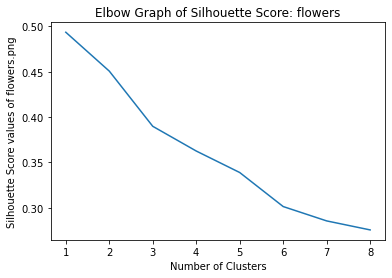

In [171]:
flowers_silhouette.reverse()
plt.plot(range(1,9), flowers_silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score values of flowers.png') 
plt.title("Elbow Graph of Silhouette Score: flowers")
plt.show()

In [172]:
lena_kmeans_256 = metrics.silhouette_score(lena_array, lena_kmeans_256.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_256)
lena_kmeans_128 = metrics.silhouette_score(lena_array, lena_kmeans_128.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_128)
lena_kmeans_64 = metrics.silhouette_score(lena_array, lena_kmeans_64.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_64)
lena_kmeans_32 = metrics.silhouette_score(lena_array, lena_kmeans_32.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_32)
lena_kmeans_16 = metrics.silhouette_score(lena_array, lena_kmeans_16.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_16)
lena_kmeans_8 = metrics.silhouette_score(lena_array, lena_kmeans_8.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_8)
lena_kmeans_4 = metrics.silhouette_score(lena_array, lena_kmeans_4.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_4)
lena_kmeans_2 = metrics.silhouette_score(lena_array, lena_kmeans_2.labels_, metric='euclidean')
lena_silhouette.append(lena_kmeans_2)
lena_silhouette

[0.24692579139674503,
 0.26227210554415686,
 0.2882253713852097,
 0.3279847087975256,
 0.37789086792591586,
 0.4127919965684369,
 0.48235453302877823,
 0.5378843558655151]

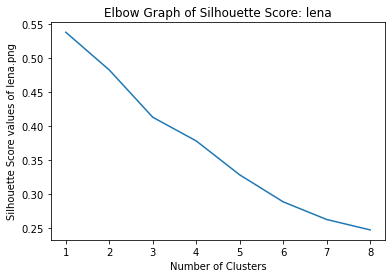

In [173]:
lena_silhouette.reverse()
plt.plot(range(1,9), lena_silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score values of lena.png') 
plt.title("Elbow Graph of Silhouette Score: lena")
plt.show()

In [174]:
umbrella_kmeans_256 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_256.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_256)
umbrella_kmeans_128 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_128.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_128)
umbrella_kmeans_64 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_64.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_64)
umbrella_kmeans_32 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_32.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_32)
umbrella_kmeans_16 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_16.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_16)
umbrella_kmeans_8 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_8.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_8)
umbrella_kmeans_4 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_4.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_4)
umbrella_kmeans_2 = metrics.silhouette_score(umbrella_array, umbrella_kmeans_2.labels_, metric='euclidean')
umbrella_silhouette.append(umbrella_kmeans_2)
umbrella_silhouette

[0.3117481621069874,
 0.3524837422070297,
 0.3959848034554938,
 0.42622707791690095,
 0.42510872325028864,
 0.4683055917330878,
 0.43833139207888705,
 0.3879333280673145]

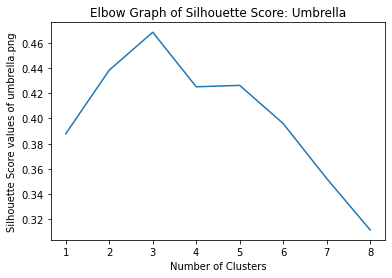

In [175]:
umbrella_silhouette.reverse()
plt.plot(range(1,9), umbrella_silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score values of umbrella.png') 
plt.title("Elbow Graph of Silhouette Score: Umbrella")
plt.show()

In [176]:
graffiti_kmeans_256 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_256.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_256)
graffiti_kmeans_128 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_128.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_128)
graffiti_kmeans_64 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_64.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_64)
graffiti_kmeans_32 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_32.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_32)
graffiti_kmeans_16 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_16.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_16)
graffiti_kmeans_8 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_8.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_8)
graffiti_kmeans_4 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_4.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_4)
graffiti_kmeans_2 = metrics.silhouette_score(graffiti_array, graffiti_kmeans_2.labels_, metric='euclidean')
graffiti_silhouette.append(graffiti_kmeans_2)
graffiti_silhouette

[0.29128734413239,
 0.3080883962868669,
 0.32466493269149965,
 0.3348041617533548,
 0.34499070725735903,
 0.3678738867800291,
 0.45750371007401175,
 0.5174832847014252]

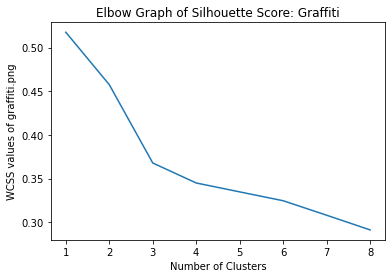

In [177]:
graffiti_silhouette.reverse()
plt.plot(range(1,9), graffiti_silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS values of graffiti.png') 
plt.title("Elbow Graph of Silhouette Score: Graffiti")
plt.show()

https://medium.com/codex/rgb-to-color-names-in-python-the-robust-way-ec4a9d97a01f

In [178]:
def convert_rgb_to_names(rgb_tuple):
    
    css3_db = CSS3_HEX_TO_NAMES
    color_names = []
    rgb = []
    for color_hex, color_name in css3_db.items():
        color_names.append(color_name)
        rgb.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb)
    distance, index = kdt_db.query(rgb_tuple)
    
    return color_names[index]

In [179]:
def find_color_name(kmeans):
    
    clustroids=kmeans.tolist() #Converts kmeans into list
    
    names=[]
    
    for c in range(len(clustroids)):
        c_name = convert_rgb_to_names(clustroids[c])
        print(c+1, c_name)
        names.append(c_name)
        
    return names


In [180]:
#Dont know why but if i want to print color names, i have to restart the kmeans clustering for all 40 image.

In [283]:
find_color_name(baboon_kmeans_256.cluster_centers_)

find_color_name(baboon_kmeans_128.cluster_centers_)

find_color_name(baboon_kmeans_64.cluster_centers_)

find_color_name(baboon_kmeans_32.cluster_centers_)

find_color_name(baboon_kmeans_16.cluster_centers_)

find_color_name(baboon_kmeans_8.cluster_centers_)

find_color_name(baboon_kmeans_4.cluster_centers_)

find_color_name(baboon_kmeans_2.cluster_centers_)


1 darkslategray
2 darkkhaki
3 dimgray
4 chocolate
5 skyblue
6 gray
7 darkseagreen
8 indianred
9 gray
10 peru
11 steelblue
12 darkolivegreen
13 lightsteelblue
14 darkgray
15 dimgray
16 darkslategray
17 slategray
18 gray
19 tomato
20 darkkhaki
21 skyblue
22 tomato
23 darkgoldenrod
24 dimgray
25 lightslategray
26 darkgray
27 dimgray
28 darkolivegreen
29 dimgray
30 slategray
31 darkgray
32 palevioletred
33 lightslategray
34 dimgray
35 rosybrown
36 dimgray
37 peru
38 tomato
39 peru
40 darkslategray
41 gray
42 darkkhaki
43 goldenrod
44 lightgray
45 skyblue
46 dimgray
47 darkgray
48 darkgray
49 sandybrown
50 darkslategray
51 olivedrab
52 gray
53 darkseagreen
54 indianred
55 silver
56 orangered
57 darkolivegreen
58 rosybrown
59 dimgray
60 saddlebrown
61 chocolate
62 tomato
63 lightslategray
64 gray
65 slategray
66 black
67 peru
68 silver
69 darkslategray
70 skyblue
71 gray
72 cornflowerblue
73 rosybrown
74 darkolivegreen
75 dimgray
76 darkseagreen
77 darkkhaki
78 indianred
79 skyblue
80 skyblu

['dimgray', 'darkgray']

In [284]:
find_color_name(flowers_kmeans_256.cluster_centers_)

find_color_name(flowers_kmeans_128.cluster_centers_)

find_color_name(flowers_kmeans_64.cluster_centers_)

find_color_name(flowers_kmeans_32.cluster_centers_)

find_color_name(flowers_kmeans_16.cluster_centers_)

find_color_name(flowers_kmeans_8.cluster_centers_)

find_color_name(flowers_kmeans_4.cluster_centers_)

find_color_name(flowers_kmeans_2.cluster_centers_)


1 plum
2 darkslategray
3 darkslateblue
4 crimson
5 black
6 slateblue
7 burlywood
8 darkmagenta
9 dimgray
10 midnightblue
11 lightpink
12 darkslategray
13 maroon
14 peru
15 salmon
16 olive
17 mediumslateblue
18 darkslateblue
19 mediumpurple
20 darkgreen
21 indigo
22 firebrick
23 burlywood
24 pink
25 gray
26 black
27 darkolivegreen
28 darkslategray
29 plum
30 gray
31 darkgreen
32 crimson
33 sienna
34 lemonchiffon
35 midnightblue
36 khaki
37 saddlebrown
38 royalblue
39 yellowgreen
40 midnightblue
41 black
42 slateblue
43 mediumblue
44 gold
45 darkslategray
46 darkorange
47 forestgreen
48 lightpink
49 crimson
50 thistle
51 darkorchid
52 mediumslateblue
53 mediumpurple
54 rosybrown
55 plum
56 olivedrab
57 darkolivegreen
58 crimson
59 indigo
60 darkkhaki
61 darkslateblue
62 darkolivegreen
63 lightcoral
64 floralwhite
65 indianred
66 indianred
67 mediumslateblue
68 crimson
69 maroon
70 darkslategray
71 midnightblue
72 brown
73 tomato
74 black
75 dimgray
76 black
77 black
78 sandybrown
79 maro

['darkslategray', 'darkgray']

In [285]:
find_color_name(lena_kmeans_256.cluster_centers_)

find_color_name(lena_kmeans_128.cluster_centers_)

find_color_name(lena_kmeans_64.cluster_centers_)

find_color_name(lena_kmeans_32.cluster_centers_)

find_color_name(lena_kmeans_16.cluster_centers_)

find_color_name(lena_kmeans_8.cluster_centers_)

find_color_name(lena_kmeans_4.cluster_centers_)

find_color_name(lena_kmeans_2.cluster_centers_)


1 lightcoral
2 brown
3 tan
4 indianred
5 indianred
6 rosybrown
7 maroon
8 dimgray
9 burlywood
10 gray
11 brown
12 darksalmon
13 indianred
14 silver
15 indianred
16 purple
17 dimgray
18 indianred
19 rosybrown
20 lightsalmon
21 darkgray
22 brown
23 peachpuff
24 burlywood
25 indianred
26 sienna
27 lightcoral
28 darksalmon
29 indigo
30 darksalmon
31 sienna
32 dimgray
33 rosybrown
34 brown
35 burlywood
36 rosybrown
37 lightcoral
38 sienna
39 navajowhite
40 maroon
41 indigo
42 darksalmon
43 indianred
44 darkslateblue
45 dimgray
46 darksalmon
47 burlywood
48 rosybrown
49 indianred
50 indianred
51 tan
52 darksalmon
53 darksalmon
54 indianred
55 darksalmon
56 indianred
57 sienna
58 indianred
59 indianred
60 maroon
61 brown
62 rosybrown
63 brown
64 indianred
65 sienna
66 indianred
67 tan
68 indianred
69 lightgray
70 wheat
71 burlywood
72 indianred
73 indigo
74 indigo
75 brown
76 indianred
77 dimgray
78 sienna
79 gray
80 brown
81 indianred
82 sienna
83 indianred
84 lightpink
85 tan
86 rosybrown
8

['darksalmon', 'brown']

In [286]:
find_color_name(umbrella_kmeans_256.cluster_centers_)

find_color_name(umbrella_kmeans_128.cluster_centers_)

find_color_name(umbrella_kmeans_64.cluster_centers_)

find_color_name(umbrella_kmeans_32.cluster_centers_)

find_color_name(umbrella_kmeans_16.cluster_centers_)

find_color_name(umbrella_kmeans_8.cluster_centers_)

find_color_name(umbrella_kmeans_4.cluster_centers_)

find_color_name(umbrella_kmeans_2.cluster_centers_)



1 steelblue
2 darkolivegreen
3 tan
4 yellowgreen
5 crimson
6 black
7 darkkhaki
8 olivedrab
9 darkslateblue
10 brown
11 rosybrown
12 lightgray
13 darkslategray
14 palevioletred
15 goldenrod
16 cadetblue
17 lightgray
18 darkseagreen
19 midnightblue
20 goldenrod
21 peru
22 steelblue
23 slateblue
24 palevioletred
25 forestgreen
26 mediumturquoise
27 brown
28 dimgray
29 crimson
30 red
31 maroon
32 silver
33 limegreen
34 skyblue
35 darkseagreen
36 hotpink
37 olive
38 seagreen
39 darkslategray
40 darkslategray
41 brown
42 bisque
43 darkseagreen
44 rosybrown
45 gray
46 darkkhaki
47 steelblue
48 burlywood
49 black
50 midnightblue
51 darkolivegreen
52 goldenrod
53 forestgreen
54 lightgray
55 maroon
56 gray
57 dimgray
58 lightsteelblue
59 black
60 darkslateblue
61 darkslategray
62 darkslateblue
63 darkgoldenrod
64 darkseagreen
65 firebrick
66 goldenrod
67 forestgreen
68 mediumturquoise
69 darkseagreen
70 steelblue
71 dimgray
72 limegreen
73 dimgray
74 indianred
75 plum
76 purple
77 silver
78 yell

['darkseagreen', 'darkolivegreen']

In [287]:
find_color_name(graffiti_kmeans_256.cluster_centers_)

find_color_name(graffiti_kmeans_128.cluster_centers_)

find_color_name(graffiti_kmeans_64.cluster_centers_)

find_color_name(graffiti_kmeans_32.cluster_centers_)

find_color_name(graffiti_kmeans_16.cluster_centers_)

find_color_name(graffiti_kmeans_8.cluster_centers_)

find_color_name(graffiti_kmeans_4.cluster_centers_)

find_color_name(graffiti_kmeans_2.cluster_centers_)

1 darkslategray
2 rosybrown
3 rosybrown
4 saddlebrown
5 antiquewhite
6 darksalmon
7 sandybrown
8 darkslateblue
9 gray
10 dimgray
11 silver
12 peru
13 lightslategray
14 gray
15 sienna
16 black
17 firebrick
18 darkolivegreen
19 black
20 saddlebrown
21 yellow
22 indianred
23 dimgray
24 darkslategray
25 lightslategray
26 darkgray
27 sienna
28 peru
29 darkslategray
30 darkslategray
31 rosybrown
32 dimgray
33 sienna
34 rosybrown
35 darkolivegreen
36 seagreen
37 darkslategray
38 crimson
39 lightpink
40 silver
41 sandybrown
42 indianred
43 gray
44 darkslategray
45 darkolivegreen
46 black
47 coral
48 indianred
49 darkslategray
50 dimgray
51 indianred
52 darkslategray
53 tan
54 darkolivegreen
55 sandybrown
56 darkseagreen
57 dimgray
58 indianred
59 linen
60 dimgray
61 darkolivegreen
62 darkslategray
63 sienna
64 peru
65 darkkhaki
66 sienna
67 brown
68 dimgray
69 chocolate
70 darkslategray
71 gainsboro
72 gray
73 darkslateblue
74 rosybrown
75 peru
76 black
77 darkslategray
78 sienna
79 lightslate

['rosybrown', 'darkslategray']

In [288]:
baboon_df = pd.DataFrame()

[139251, 122197, 97407, 68332, 44662, 27878, 15395, 9427]

In [295]:
baboon_df["k Value"]=k_list
baboon_df["Image Bytes"] = baboon_bytes[0:8]
baboon_df["WCSS"] = baboon_wcss
baboon_df["BCSS"] = baboon_bcss
baboon_df["Silhouette Coefficient"] = baboon_silhouette
#baboon_df["Color names"] = baboon_ucolors

In [296]:
baboon_df

k Value  Image Bytes         WCSS          BCSS  Silhouette Coefficient
0      256       139251  4633.811167  1.509674e+13                0.386851
1      128       122197  1881.748745  2.696503e+13                0.426047
2       64        97407   966.084274  3.089790e+13                0.364207
3       32        68332   522.732325  3.279109e+13                0.325187
4       16        44662   295.892282  3.374279e+13                0.303719
5        8        27878   179.711279  3.423942e+13                0.263192
6        4        15395   113.227698  3.452812e+13                0.244817
7        2         9427    72.026366  3.470138e+13                0.234600

In [308]:
flowers_silhouette = [0.2754692293512301,
 0.2854090865571455,
 0.3012546233048894,
 0.33881921914462215,
 0.362555953302056,
 0.38983618484264504,
 0.4507647662785047,
 0.49365931107946603]

In [309]:
flowers_df = pd.DataFrame()
flowers_df["k Value"]=k_list
flowers_df["Image Bytes"] = flowers_bytes
flowers_df["WCSS"] = flowers_wcss
flowers_df["BCSS"] = flowers_bcss
flowers_df["Silhouette Coefficient"] = flowers_silhouette
#flowers_df["Color names"] = flowers_ucolors

In [310]:
flowers_df

k Value  Image Bytes         WCSS          BCSS  Silhouette Coefficient
0      256       123173   141.870096  7.439726e+13                0.275469
1      128       108147   233.311151  7.400339e+13                0.285409
2       64        87154   384.762679  7.334299e+13                0.301255
3       32        65160   651.152316  7.220837e+13                0.338819
4       16        43400  1154.636862  7.005187e+13                0.362556
5        8        26032  2128.081096  6.584429e+13                0.389836
6        4        14116  3930.105316  5.815378e+13                0.450765
7        2         7558  7451.615352  4.299531e+13                0.493659

In [320]:
lena_silhouette=[0.24692579139674503,
 0.26227210554415686,
 0.2882253713852097,
 0.3279847087975256,
 0.37789086792591586,
 0.4127919965684369,
 0.48235453302877823,
 0.5378843558655151]

In [321]:
lena_df = pd.DataFrame()
lena_df["k Value"]=k_list
lena_df["Image Bytes"] = lena_bytes
lena_df["WCSS"] = lena_wcss
lena_df["BCSS"] = lena_bcss
lena_df["Silhouette Coefficient"] = lena_silhouette
#lena_df["Color names"] = lena_ucolors

In [322]:
lena_df

k Value  Image Bytes         WCSS          BCSS  Silhouette Coefficient
0      256        98011    22.851251  2.658228e+13                0.246926
1      128        82144    36.258789  2.652131e+13                0.262272
2       64        63082    58.703406  2.642488e+13                0.288225
3       32        44147   100.555945  2.624453e+13                0.327985
4       16        28663   187.793837  2.587238e+13                0.377891
5        8        18788   374.232656  2.508385e+13                0.412792
6        4        10585   786.313326  2.332820e+13                0.482355
7        2         4706  2242.249686  1.705161e+13                0.537884

In [324]:
umbrella_silhouette=[0.3117481621069874,
 0.3524837422070297,
 0.3959848034554938,
 0.42622707791690095,
 0.42510872325028864,
 0.4683055917330878,
 0.43833139207888705,
 0.3879333280673145]

In [325]:
umbrella_df = pd.DataFrame()
umbrella_df["k Value"]=k_list
umbrella_df["Image Bytes"] = umbrella_bytes
umbrella_df["WCSS"] = umbrella_wcss
umbrella_df["BCSS"] = umbrella_bcss
umbrella_df["Silhouette Coefficient"] = umbrella_silhouette
#umbrella_df["Color names"] = umbrella_ucolors
umbrella_df

k Value  Image Bytes         WCSS          BCSS  Silhouette Coefficient
0      256        83962    69.774271  6.250168e+13                0.311748
1      128        69733   118.804865  6.229720e+13                0.352484
2       64        51491   215.330608  6.185278e+13                0.395985
3       32        35859   426.139658  6.096688e+13                0.426227
4       16        26995   876.402117  5.901232e+13                0.425109
5        8        17416  1824.074470  5.495328e+13                0.468306
6        4        11125  4296.305053  4.436502e+13                0.438331
7        2         6522  8256.576879  2.732952e+13                0.387933

In [327]:
graffiti_silhouette=[0.29128734413239,
 0.3080883962868669,
 0.32466493269149965,
 0.3348041617533548,
 0.34499070725735903,
 0.3678738867800291,
 0.45750371007401175,
 0.5174832847014252]

In [328]:
graffiti_df = pd.DataFrame()
graffiti_df["k Value"]=k_list
graffiti_df["Image Bytes"] = graffiti_bytes
graffiti_df["WCSS"] = graffiti_wcss
graffiti_df["BCSS"] = graffiti_bcss
graffiti_df["Silhouette Coefficient"] = graffiti_silhouette
#graffiti_df["Color names"] = graffiti_ucolors
graffiti_df

k Value  Image Bytes         WCSS          BCSS  Silhouette Coefficient
0      256       115419    60.915050  3.865623e+13                0.291287
1      128        96728   102.929404  3.847275e+13                0.308088
2       64        78329   180.672638  3.814271e+13                0.324665
3       32        61957   328.921896  3.750615e+13                0.334804
4       16        43509   587.097209  3.636762e+13                0.344991
5        8        28070   988.796155  3.465736e+13                0.367874
6        4        14870  1764.546744  3.133101e+13                0.457504
7        2         7897  3561.984802  2.362165e+13                0.517483